<a href="https://colab.research.google.com/github/hanngocdao2003/Tieu-Luan/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
exit()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
try:
  from google.colab import drive
  drive.mount('/content/gdrive/', force_remount=True)
  %cd '/content/gdrive/MyDrive/TEMPORATION/Tiểu luận/data'
except ImportError as e:
  print('Cannot mount to your folder')

Mounted at /content/gdrive/
/content/gdrive/MyDrive/TEMPORATION/Tiểu luận/data


In [ ]:
df = pd.read_csv('PS_log.csv')
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
print('Step - from {} to {}'.format(df.step.min(), df.step.max()))

Step - from 1 to 743


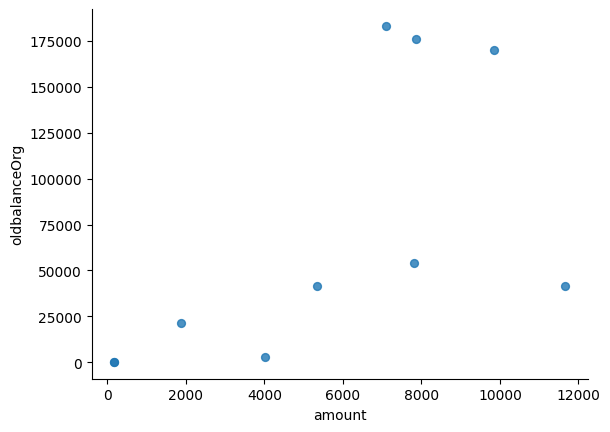

In [ ]:
from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='amount', y='oldbalanceOrg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

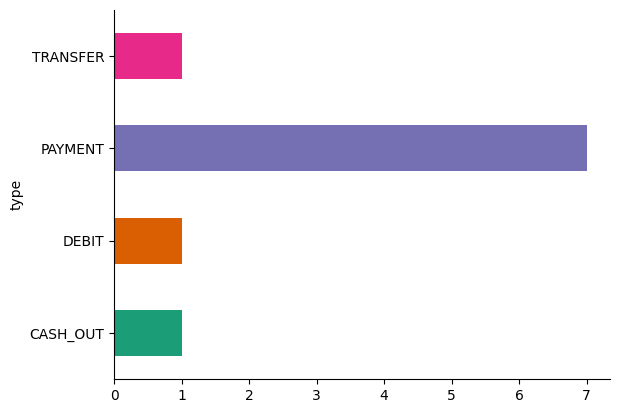

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_0['amount'].plot(kind='hist', bins=20, title='amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
df['isFlaggedFraud'].unique()

array([0, 1])

In [ ]:
df['isFraud'].unique()

array([0, 1])

In [ ]:
df['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

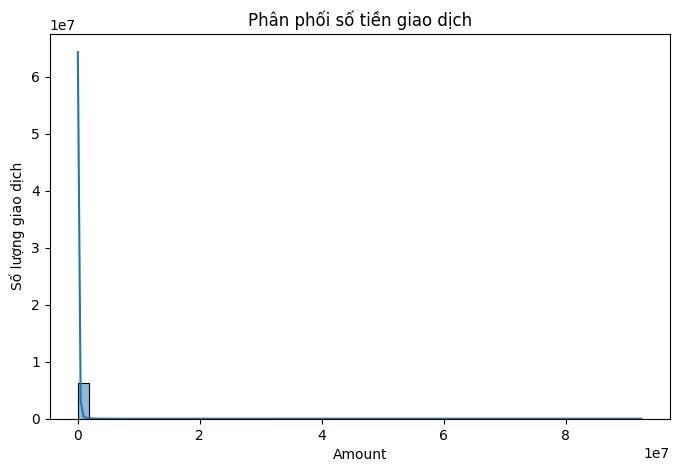

In [ ]:
# 1. Histogram - Phân phối số tiền giao dịch
plt.figure(figsize=(8, 5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Phân phối số tiền giao dịch")
plt.xlabel("Amount")
plt.ylabel("Số lượng giao dịch")
plt.show()

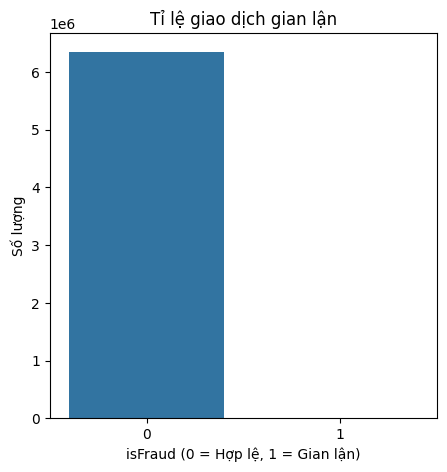

In [ ]:
# 2. Bar Plot - Tỉ lệ giao dịch gian lận
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='isFraud')
plt.title("Tỉ lệ giao dịch gian lận")
plt.xlabel("isFraud (0 = Hợp lệ, 1 = Gian lận)")
plt.ylabel("Số lượng")
plt.show()

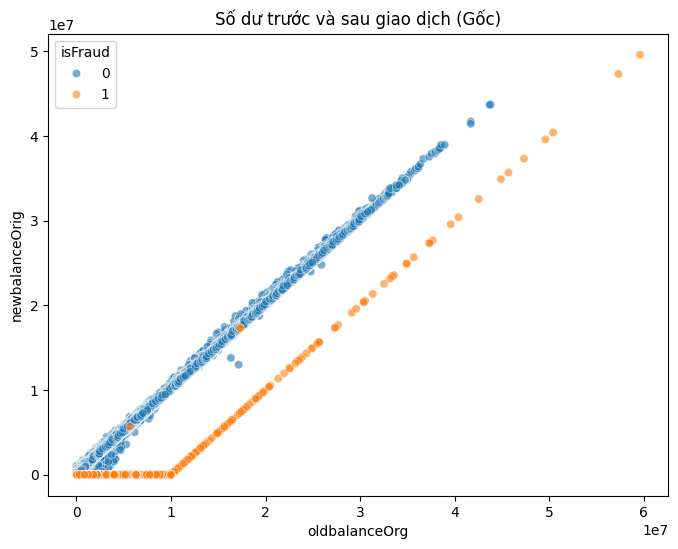

In [ ]:
# 3. Scatter Plot - So sánh số dư trước và sau giao dịch
plt.figure(figsize=(8, 6))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=df, alpha=0.6)
plt.title("Số dư trước và sau giao dịch (Gốc)")
plt.xlabel("oldbalanceOrg")
plt.ylabel("newbalanceOrig")
plt.legend(title="isFraud")
plt.show()

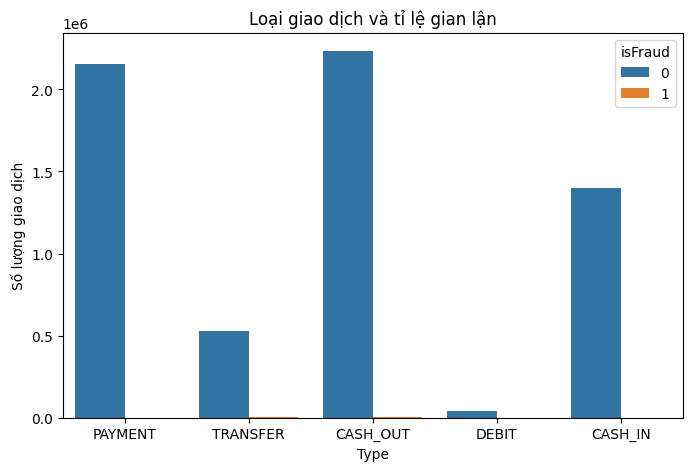

In [ ]:
# 4. Bar Plot - Loại giao dịch và gian lận
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title("Loại giao dịch và tỉ lệ gian lận")
plt.xlabel("Type")
plt.ylabel("Số lượng giao dịch")
plt.legend(title="isFraud")
plt.show()

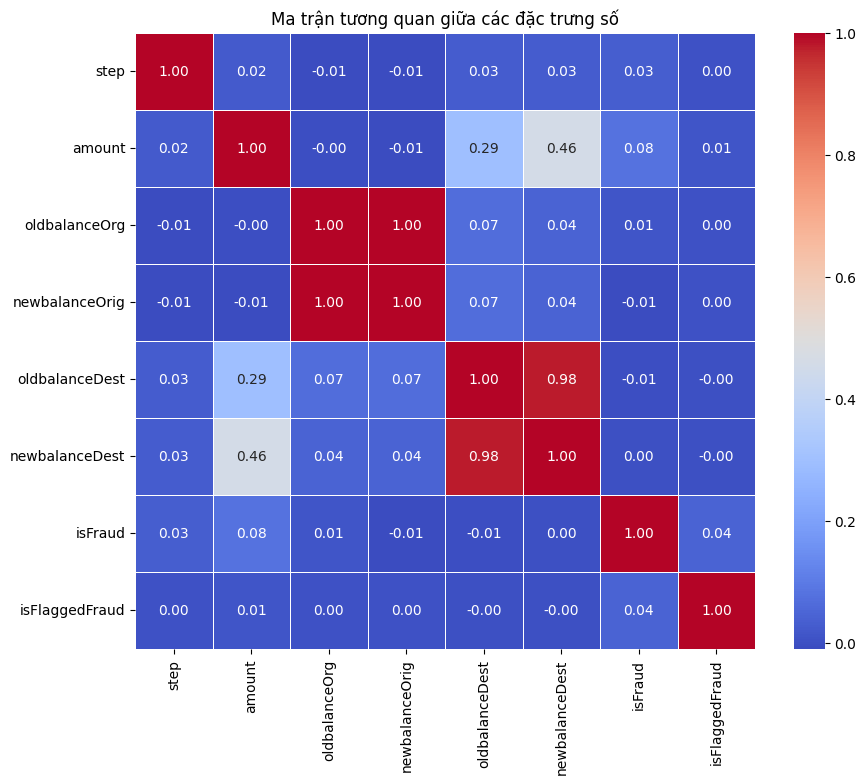

In [ ]:
# 5. Heatmap - Ma trận tương quan
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan giữa các đặc trưng số")
plt.show()

#ISFRAUD


In [ ]:
fraud_counts=df['isFraud'].value_counts()
print(fraud_counts)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


#ISFlaggedFRAUD



In [ ]:
flag_fraud_counts=df['isFlaggedFraud'].value_counts()
print(flag_fraud_counts)

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#Number of transactions which were considered to be fraudulent


In [ ]:
df_flagged = df.loc[df.isFlaggedFraud == 1]
print('Sum of isFlaggedFraud = 1: ', len(df_flagged))
df_flagged

Sum of isFlaggedFraud = 1:  16


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


#Show the total of transactions that were considered to be fraudulent and the previous and new balance is 0

In [ ]:
df_total_transfer = df.loc[(df.type == 'TRANSFER')]
df_total_transactions = df_total_transfer.loc[(df_total_transfer.oldbalanceDest == 0) & (df_total_transfer.newbalanceDest == 0)]
print('Sum of transactions that were considered to be fraudulent and the previous and new balance is 0: ', len(df_total_transactions))
df_total_transactions

Sum of transactions that were considered to be fraudulent and the previous and new balance is 0:  4174


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


#Further investigation whether isFlaggedFraud is a useful column in the dataset

In [ ]:
print(df_flagged.amount.min())
print(df_total_transfer.loc[df_total_transfer.isFlaggedFraud == 0].amount.max())

transfers = df_total_transfer.loc[df_total_transfer.amount > 200000]

transfers.loc[transfers.isFlaggedFraud == 0]

353874.22
92445516.64


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
84,1,TRANSFER,379856.23,C1449772539,0.00,0.0,C1590550415,900180.00,19169204.93,0,0
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.0,C1744173808,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


#Get the minimum and maximum amount of where fraud is flagged and not flagged

In [ ]:
round(df_flagged.oldbalanceOrg.min())
print('Min, Max of oldBalanceOrg for isFlaggedFraud = 1 TRANSFERs: {}, {}'.format(round(df_flagged.oldbalanceOrg.min()), round(df_flagged.oldbalanceOrg.max())))
print('Min, Max of oldBalanceOrg for isFlaggedFraud = 0 TRANSFERs where oldBalanceOrg = newBalanceOrig: {}'.format([round(df_total_transfer.loc[(df_total_transfer.isFlaggedFraud == 0) & (df_total_transfer.oldbalanceOrg == df_total_transfer.newbalanceOrig)].oldbalanceOrg.min()), round(df_total_transfer.loc[(df_total_transfer.isFlaggedFraud == 0) & (df_total_transfer.oldbalanceOrg == df_total_transfer.newbalanceOrig)].oldbalanceOrg.max())]))

Min, Max of oldBalanceOrg for isFlaggedFraud = 1 TRANSFERs: 353874, 19585040
Min, Max of oldBalanceOrg for isFlaggedFraud = 0 TRANSFERs where oldBalanceOrg = newBalanceOrig: [0, 575668]


#Check if duplicate customers exist based on the isFlaggedFraud status

In [ ]:
df_flagged = df.loc[df.isFlaggedFraud == 1]
df_not_flagged = df.loc[df.isFlaggedFraud == 0]

print('In the transaction\'s nameOrig flagged as fraud more than once? {}\n'.format(df_flagged.nameOrig.isin(pd.concat([df_not_flagged.nameOrig, df_not_flagged.nameDest])).any()))

print('Have destinations for transactions flagged as fraud initiated other transactions: {}\n'.format((df_flagged.nameDest.isin(df_not_flagged.nameOrig)).any()))

print('How many destination accounts of transactions flagged as fraud have been destination accounts more than once? {}\n'.format(sum(df_flagged.nameDest.isin(df_not_flagged.nameDest))))

In the transaction's nameOrig flagged as fraud more than once? False

Have destinations for transactions flagged as fraud initiated other transactions: False

How many destination accounts of transactions flagged as fraud have been destination accounts more than once? 2



#Check if merchants are involved in different types of transactions

Merchants ('M') are not involved in CASH_IN (paid by the merchant)
transactions to customers ('C'). There are also no merchants among
destination accounts for CASH_OUT transactions (paying a merchant).
However, merchants exist for all PAYMENTs transactions in nameDest.

In [ ]:
print('Are there any merchants in nameOrif for CASH_IN transactions? {}\n'.format(df.loc[df.type == 'CASH_IN'].nameOrig.str.contains('M').any()))

print('Are there any merchants in nameDest for CASH_OUT transactions? {}\n'.format(df.loc[df.type == 'CASH_OUT'].nameDest.str.contains('M').any()))

print('Are there any transactions do not have merchants in nameDest in the PAYMENT type? {}\n'.format((df.loc[df.nameDest.str.contains('M')].type != 'PAYMENT').any()))

Are there any merchants in nameOrif for CASH_IN transactions? False

Are there any merchants in nameDest for CASH_OUT transactions? False

Are there any transactions do not have merchants in nameDest in the PAYMENT type? False



#Check for transactions where the destination for Transfer transactions matches for CASH OUT

In [ ]:
df_fraud_transfer = df.loc[(df.isFlaggedFraud == 1) & (df.type == 'TRANSFER')]
df_fraud_cash_out = df.loc[(df.type == 'CASH_OUT')]
print('Are there any transactiosn where nameDest for TRANSFER and nameOrig for CASH OUT match? {}\n'.format((df_fraud_transfer.nameDest.isin(df_fraud_cash_out.nameOrig)).any()))

df.loc[df.isFraud == 1]

Are there any transactiosn where nameDest for TRANSFER and nameOrig for CASH OUT match? False



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


#Get fraudulent transactions that have a genuine CASH OUT status

In [ ]:
df_genuine_cash_out = df.loc[(df.isFraud == 0) & (df.type == 'CASH_OUT')]
df_fraudulent_transfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]

print('Fraudulent TRANSFERs where the destination accounts initially had genuine CASH OUTs.\n\n')

df_fraud_transfer.loc[df_fraud_transfer.nameDest.isin(df_genuine_cash_out.nameDest.drop_duplicates())]

Fraudulent TRANSFERs where the destination accounts initially had genuine CASH OUTs.




,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1


#DATA ENCODING
In order to apply different machine learning algorithms to the data, the
fields need to be numbers. TRANSFERs are denoted by 0 and CASH_OUTs
by 1.

In [ ]:
df = pd.read_csv('PS_log.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_orig = LabelEncoder()
le_dest = LabelEncoder()

df['nameOrig'] = le_orig.fit_transform(df['nameOrig'])
df['nameDest'] = le_dest.fit_transform(df['nameDest'])

In [ ]:
df['balanceChangeOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceChangeDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [ ]:
df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)

In [ ]:
le_type = LabelEncoder()
df['type'] = le_type.fit_transform(df['type'])

In [ ]:
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


#Decision Tree


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn import tree
import time

In [ ]:
start_time = time.time()

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

end_time = time.time()

In [ ]:
training_time = end_time - start_time
print(f"Thời gian chạy Decision Tree: {training_time:.4f} giây")

Thời gian chạy Decision Tree: 85.3670 giây


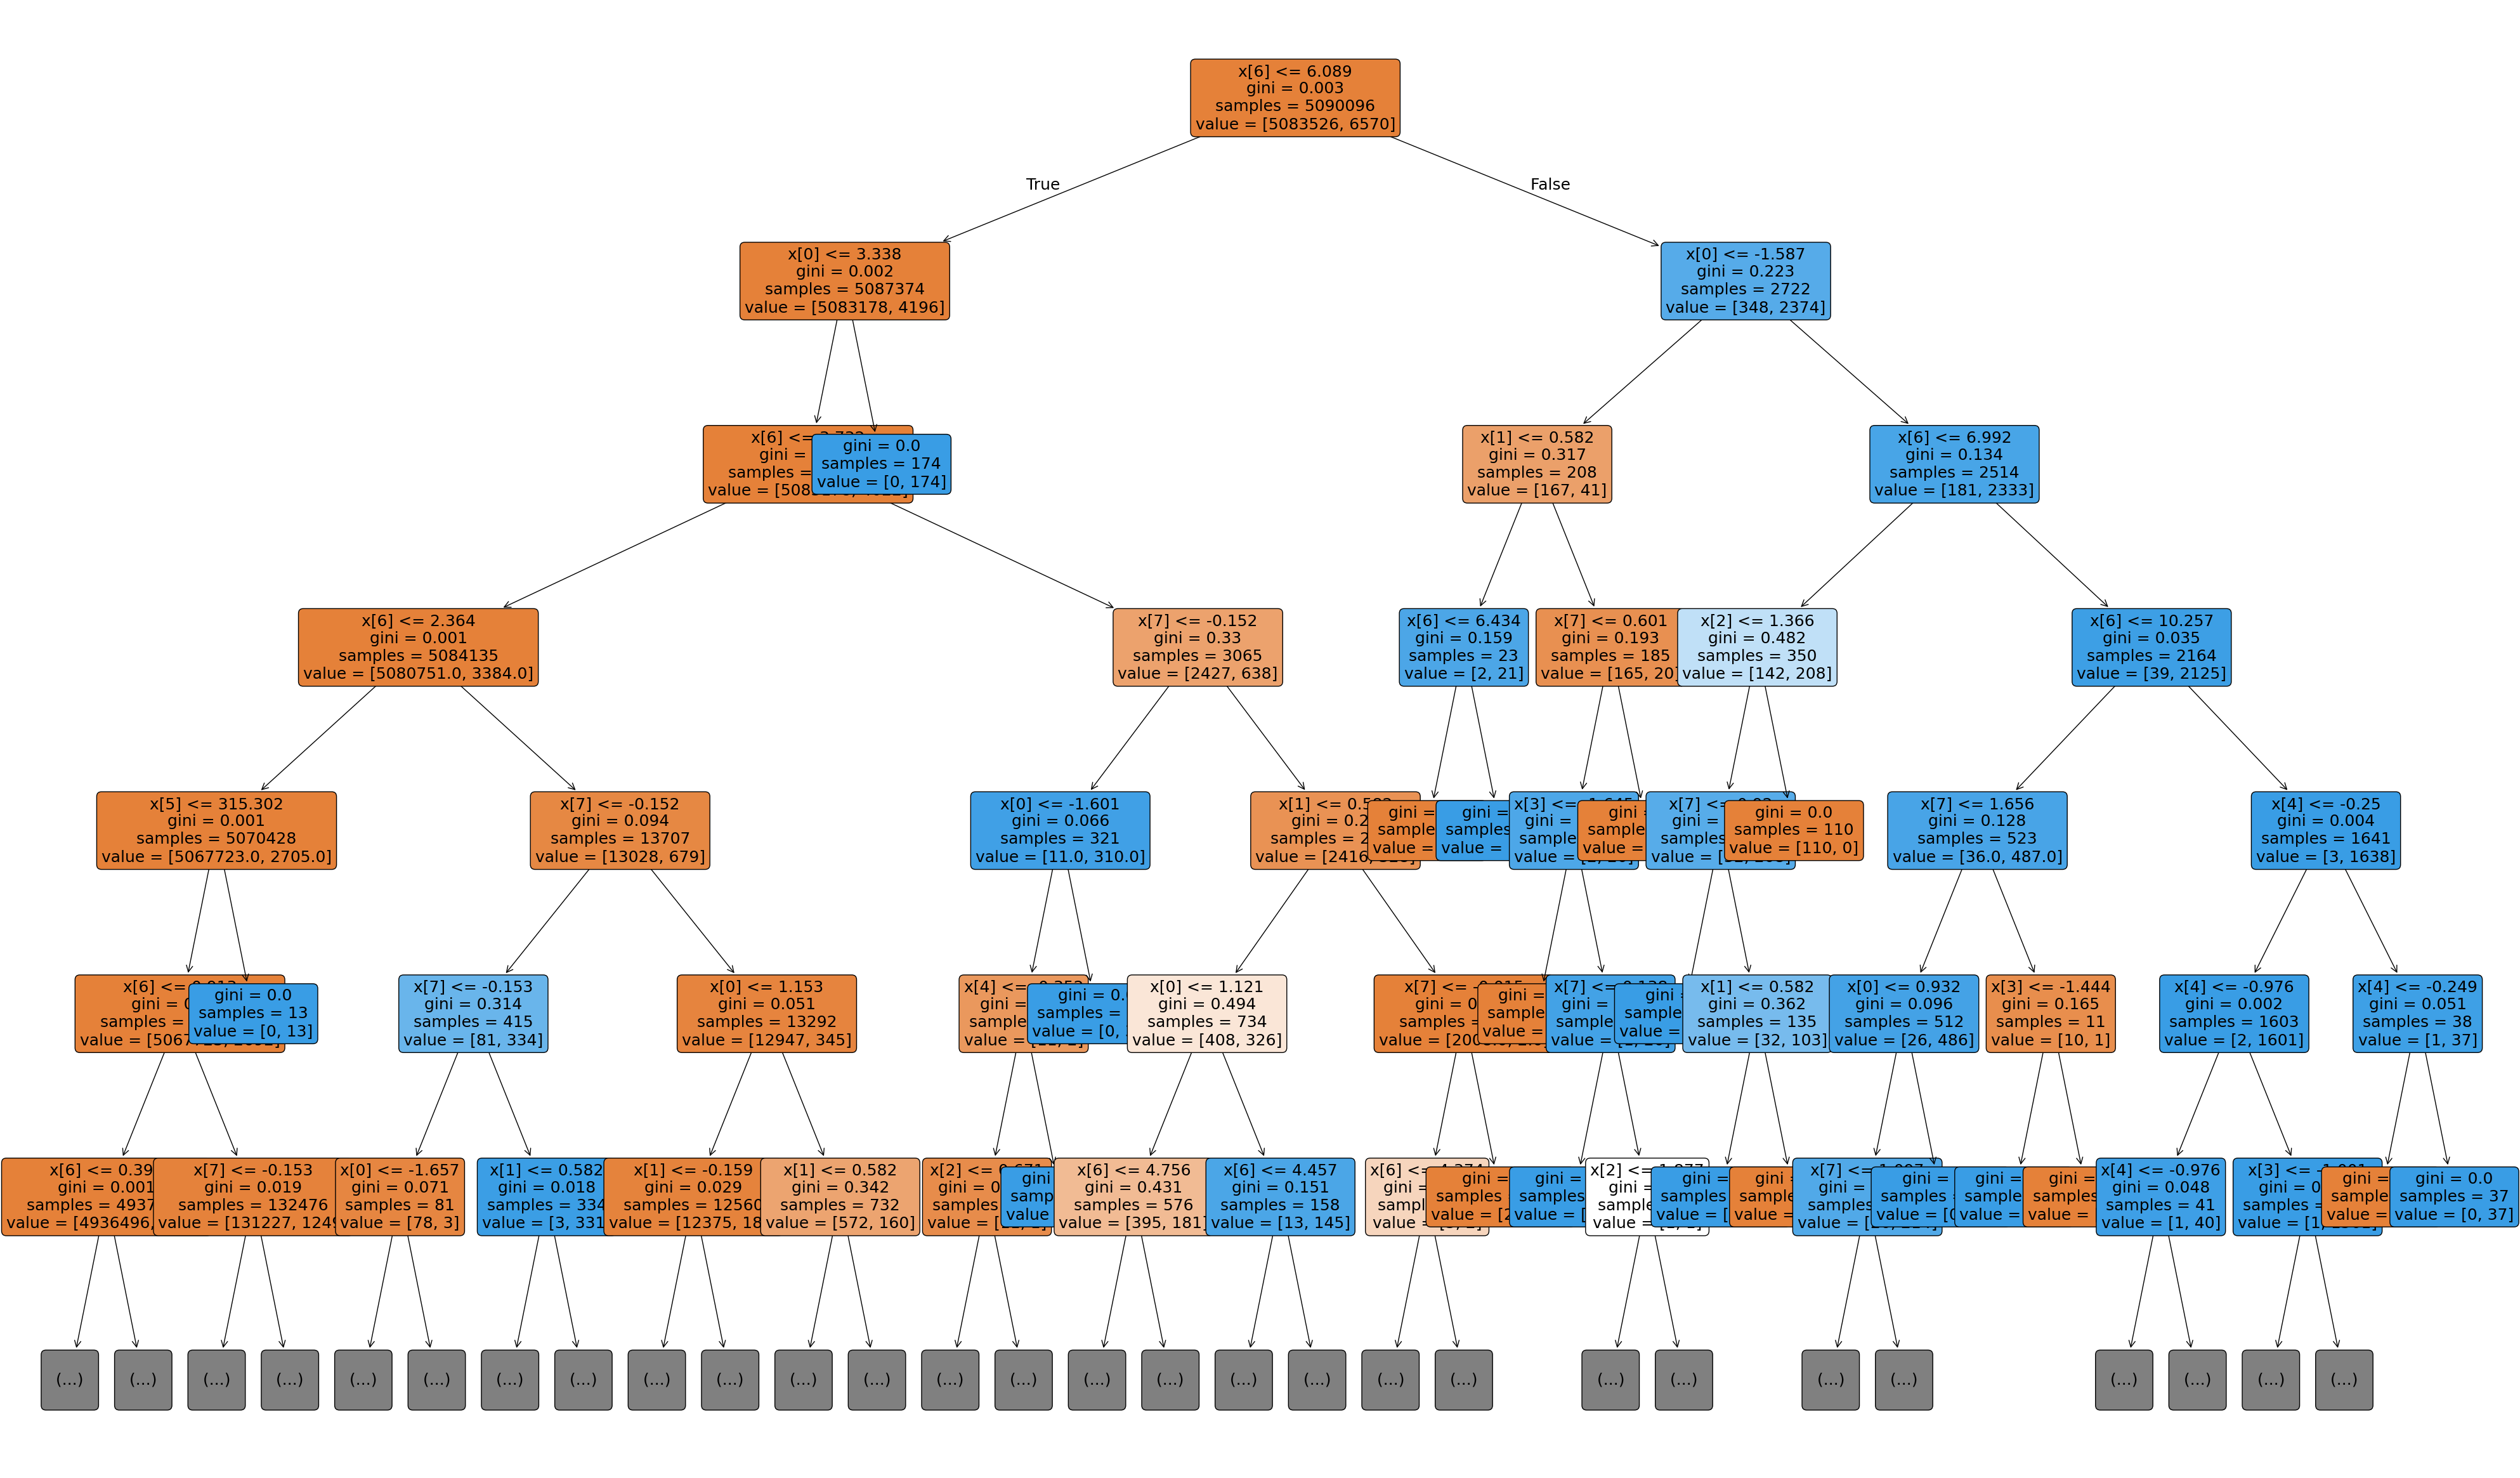

In [ ]:
#plot tree
plt.figure(figsize=(50,30))
tree.plot_tree(dt_model, filled=True, rounded=True, fontsize= 18, max_depth=6)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)



In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Metric", "Decision Tree"]
table.add_row(["Accuracy", accuracy_dt])
table.add_row(["Precision", precision_dt])
table.add_row(["Recall", recall_dt])
table.add_row(["F1 Score", f1_dt])

print(table)

+-----------+--------------------+
|   Metric  |   Decision Tree    |
+-----------+--------------------+
|  Accuracy | 0.9994137635125153 |
| Precision | 0.773308957952468  |
|   Recall  | 0.7723676202069385 |
|  F1 Score | 0.7728380024360536 |
+-----------+--------------------+


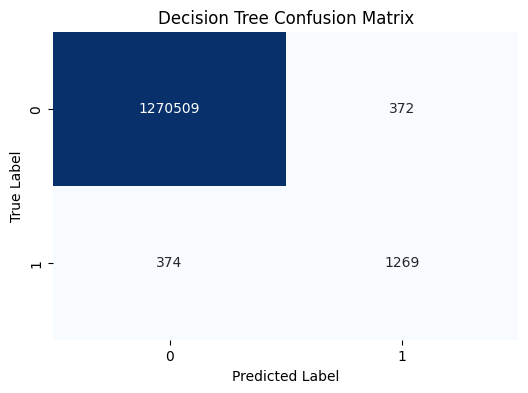

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Decision Tree Confusion Matrix
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")



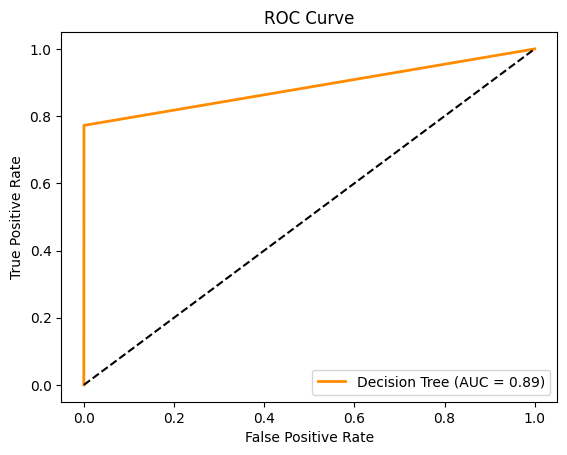

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_dt_prob = dt_model.predict_proba(X_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_prob[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

start_time = time.time()
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
end_time = time.time()

In [ ]:
training_time = end_time - start_time
print(f"Thời gian chạy Random Forest: {training_time:.4f} giây")

Thời gian chạy Random Forest: 1575.8560 giây


In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Metric", "Random Forest"]
table.add_row(["Accuracy", accuracy_rf])
table.add_row(["Precision", precision_rf])
table.add_row(["Recall", recall_rf])
table.add_row(["F1 Score", f1_rf])

print(table)

+-----------+--------------------+
|   Metric  |   Random Forest    |
+-----------+--------------------+
|  Accuracy | 0.9996377278542488 |
| Precision | 0.9781553398058253 |
|   Recall  | 0.7358490566037735 |
|  F1 Score | 0.8398749565821466 |
+-----------+--------------------+


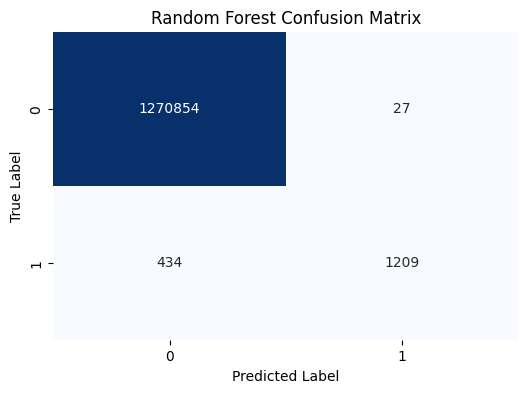

In [ ]:
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

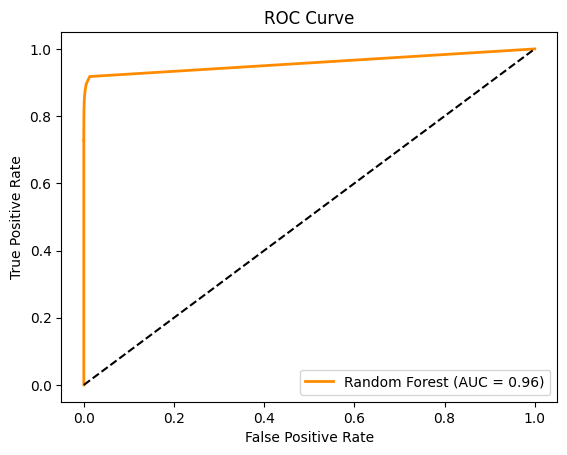

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_rf_prob = rf_model.predict_proba(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

start_time = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
end_time = time.time()

In [ ]:
training_time = end_time - start_time
print(f"Thời gian chạy Naive Bayes: {training_time:.4f} giây")

Thời gian chạy Naive Bayes: 1.9841 giây


In [ ]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Metric", "Naive Bayes"]
table.add_row(["Accuracy", accuracy_nb])
table.add_row(["Precision", precision_nb])
table.add_row(["Recall", recall_nb])
table.add_row(["F1 Score", f1_nb])

print(table)

+-----------+---------------------+
|   Metric  |     Naive Bayes     |
+-----------+---------------------+
|  Accuracy |  0.996142312443616  |
| Precision |  0.1410989010989011 |
|   Recall  |  0.3907486305538649 |
|  F1 Score | 0.20733085741966736 |
+-----------+---------------------+


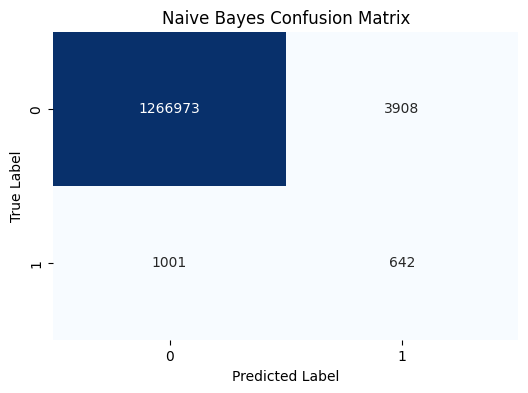

In [ ]:
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes Confusion Matrix")

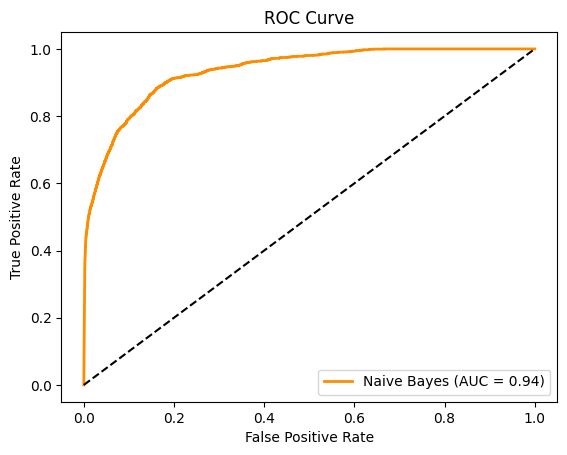

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_nb_prob = nb_model.predict_proba(X_test)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb_prob[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)


plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

##

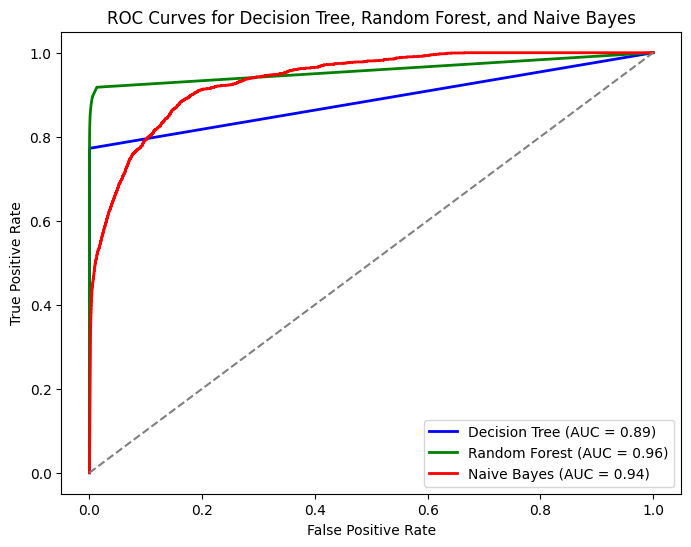

In [ ]:
# Plot ROC curves on the same plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree, Random Forest, and Naive Bayes')
plt.legend(loc='lower right')
plt.show()

#Feature Importance

In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Loại bỏ các cột có Importance thấp (tùy ngưỡng, ví dụ < 0.01)
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature']
X = df[selected_features]

             Feature  Importance
6  balanceChangeOrig    0.352139
7  balanceChangeDest    0.307780
0               step    0.120235
2             amount    0.095995
3           nameOrig    0.043436
4           nameDest    0.042908
1               type    0.036058
5     isFlaggedFraud    0.001448


#Hyperparameter Tuning
Dùng GridSearchCV hoặc RandomizedSearchCV để tìm siêu tham số tốt nhất cho mô hình.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    # AUC-ROC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    print("AUC-ROC Score:", auc_score)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="best")
    plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import time

In [ ]:
# Xác định các giá trị siêu tham số
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Tìm siêu tham số tốt nhất
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Đánh giá mô hình tốt nhất
y_pred_best_rf = best_rf_model.predict(X_test)
print("\nOptimized Random Forest:")
evaluate_model(best_rf_model, X_test, y_test, y_pred_best_rf)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Thời gian chạy Decision Tree using GridSearchCV: 1240.1013 giây

Optimized Decision Tree:
[[1270844      37]
 [    601    1042]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      0.63      0.77      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.82      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy: 0.9994986342104353
AUC-ROC Score: 0.9721285218564073


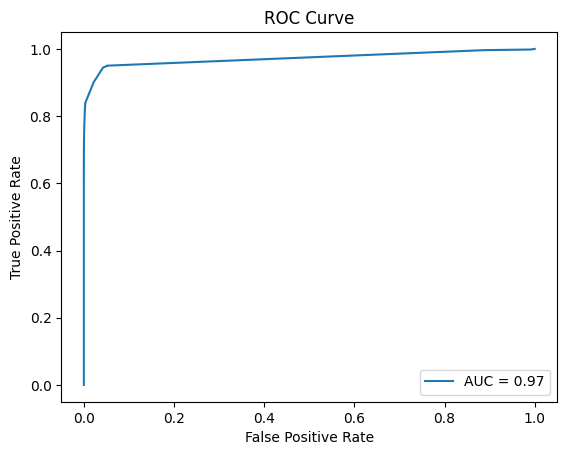

In [ ]:
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
start_time = time.time()
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Decision Tree tốt nhất
best_dt_model = grid_search_dt.best_estimator_
print("Best Parameters:", grid_search_dt.best_params_)

y_pred_best_dt = best_dt_model.predict(X_test)
end_time = time.time()

print(f"Thời gian chạy Decision Tree using GridSearchCV: {end_time - start_time:.4f} giây")
print("\nOptimized Decision Tree:")
evaluate_model(best_dt_model, X_test, y_test, y_pred_best_dt)


In [ ]:
accuracy_dt_gs = accuracy_score(y_test, y_pred_best_dt)
precision_dt_gs = precision_score(y_test, y_pred_best_dt)
recall_dt_gs = recall_score(y_test, y_pred_best_dt)
f1_dt_gs = f1_score(y_test, y_pred_best_dt)

In [ ]:
!pip install prettytable

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ["Metric", "Decision Tree","Decision Tree using GridSearchCV"]
table.add_row(["Accuracy", accuracy_dt, accuracy_dt_gs])
table.add_row(["Precision", precision_dt, precision_dt_gs])
table.add_row(["Recall", recall_dt, recall_dt_gs])
table.add_row(["F1 Score", f1_dt, f1_dt_gs])

print(table)


+-----------+--------------------+----------------------------------+
|   Metric  |   Decision Tree    | Decision Tree using GridSearchCV |
+-----------+--------------------+----------------------------------+
|  Accuracy | 0.9994137635125153 |        0.9994986342104353        |
| Precision | 0.773308957952468  |        0.9657089898053753        |
|   Recall  | 0.7723676202069385 |        0.6342057212416312        |
|  F1 Score | 0.7728380024360536 |        0.7656135194709772        |
+-----------+--------------------+----------------------------------+


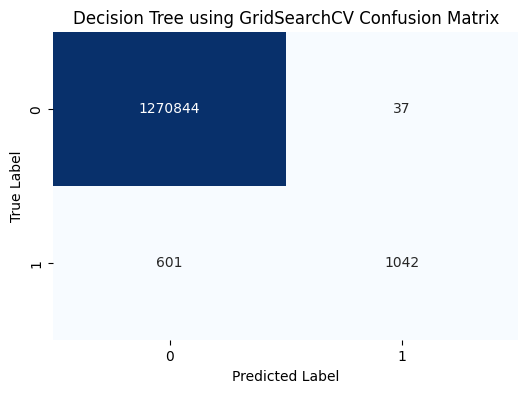

In [ ]:
plot_confusion_matrix(y_test, y_pred_best_dt, "Decision Tree using GridSearchCV Confusion Matrix")

In [ ]:
y_pred_best_dt_prob = best_dt_model.predict_proba(X_test)
fpr_dt_gs, tpr_dt_gs, _ = roc_curve(y_test, y_pred_best_dt_prob[:, 1])

roc_auc_dt_gs = auc(fpr_dt_gs, tpr_dt_gs)

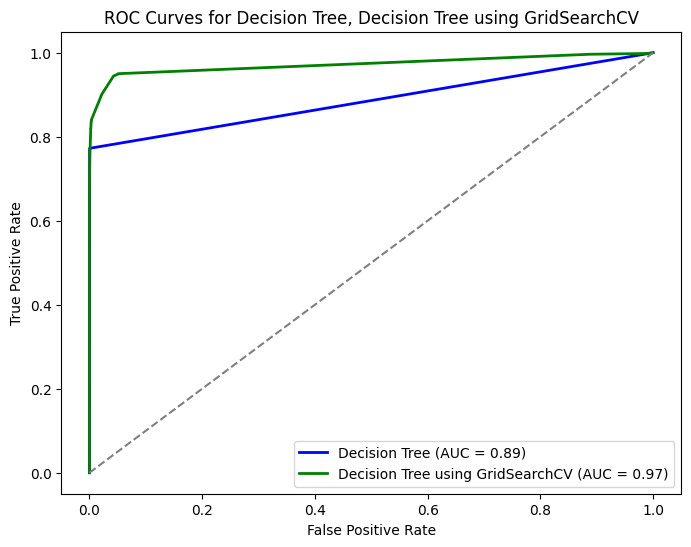

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_dt_gs, tpr_dt_gs, color='green', lw=2, label=f'Decision Tree using GridSearchCV (AUC = {roc_auc_dt_gs:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree, Decision Tree using GridSearchCV')
plt.legend(loc='lower right')
plt.show()

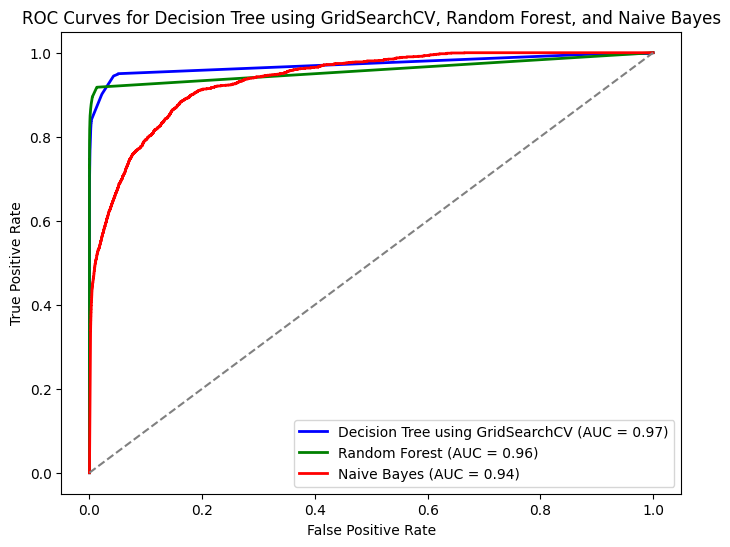

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.plot(fpr_dt_gs, tpr_dt_gs, color='blue', lw=2, label=f'Decision Tree using GridSearchCV (AUC = {roc_auc_dt_gs:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree using GridSearchCV, Random Forest, and Naive Bayes')
plt.legend(loc='lower right')
plt.show()

#BALANCED

In [ ]:
from sklearn.model_selection import train_test_split


# **#plot confusion matrix**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [ ]:
!pip install imblearn

In [ ]:
!pip install prettytable

In [ ]:
df_balanced = pd.read_csv('PS_log.csv')

In [ ]:
df_balanced['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_orig = LabelEncoder()
le_dest = LabelEncoder()

df_balanced['nameOrig'] = le_orig.fit_transform(df_balanced['nameOrig'])
df_balanced['nameDest'] = le_dest.fit_transform(df_balanced['nameDest'])

df_balanced['balanceChangeOrig'] = df_balanced['oldbalanceOrg'] - df_balanced['newbalanceOrig']
df_balanced['balanceChangeDest'] = df_balanced['newbalanceDest'] - df_balanced['oldbalanceDest']

df_balanced.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)

le_type = LabelEncoder()
df_balanced['type'] = le_type.fit_transform(df_balanced['type'])


In [ ]:
X_balanced = df_balanced.drop(['isFraud'], axis=1)
y_balanced = df_balanced['isFraud']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_balanced = scaler.fit_transform(X_balanced)

#**undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_scaled_balanced, y_balanced)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [ ]:
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 8213), (1, 8213)]


In [ ]:
y_resampled.value_counts()

,count
isFraud,
0,8213
1,8213


In [ ]:
X_resampled

array([[-5.71883122e-01, -5.28954357e-01,  6.53202450e-03, ...,
        -1.58577857e-03,  2.77009392e-01,  7.32054767e-02],
       [-7.47528845e-01,  9.52399323e-01, -2.96991145e-01, ...,
        -1.58577857e-03,  1.44776939e-01, -1.52895517e-01],
       [-4.52444031e-01,  9.52399323e-01, -2.92094615e-01, ...,
        -1.58577857e-03,  1.68495586e-01, -1.52895517e-01],
       ...,
       [ 3.51012348e+00, -5.28954357e-01,  1.01539526e+01, ...,
        -1.58577857e-03,  4.31839772e+01,  7.61079787e+00],
       [ 3.51012348e+00,  1.69307616e+00,  1.10976490e+00, ...,
        -1.58577857e-03,  5.94117313e+00, -1.52895517e-01],
       [ 3.51012348e+00, -5.28954357e-01,  1.10976490e+00, ...,
        -1.58577857e-03,  5.94117313e+00,  8.92696467e-01]])

#undersampling - Decision Tree


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn import tree
import time

In [ ]:
start_time_balanced = time.time()

dt_model_balanced = DecisionTreeClassifier(random_state=42)
dt_model_balanced.fit(X_resampled, y_resampled)
y_pred_dt_balanced = dt_model_balanced.predict(X_test_balanced)

end_time_balanced = time.time()

In [ ]:
training_time = end_time_balanced - start_time_balanced
print(f"Thời gian chạy Decision Tree: {training_time:.4f} giây")

Thời gian chạy Decision Tree: 0.1848 giây


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_dt_balanced = accuracy_score(y_test_balanced, y_pred_dt_balanced)
precision_dt_balanced = precision_score(y_test_balanced, y_pred_dt_balanced)
recall_dt_balanced = recall_score(y_test_balanced, y_pred_dt_balanced)
f1_dt_balanced = f1_score(y_test_balanced, y_pred_dt_balanced)


In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Metric", "Decision Tree"]
table.add_row(["Accuracy", accuracy_dt_balanced])
table.add_row(["Precision", precision_dt_balanced])
table.add_row(["Recall", recall_dt_balanced])
table.add_row(["F1 Score", f1_dt_balanced])

print(table)

+-----------+---------------+
|   Metric  | Decision Tree |
+-----------+---------------+
|  Accuracy |      1.0      |
| Precision |      1.0      |
|   Recall  |      1.0      |
|  F1 Score |      1.0      |
+-----------+---------------+


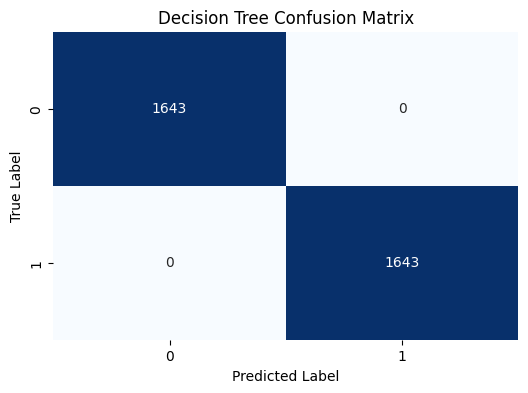

In [ ]:
plot_confusion_matrix(y_test_balanced, y_pred_dt_balanced, "Decision Tree Confusion Matrix")

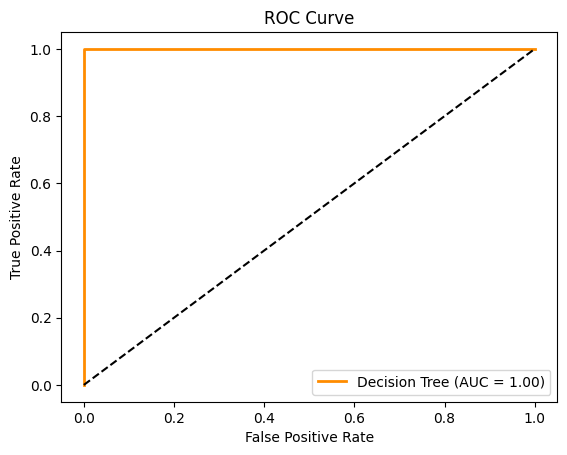

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_dt_prob = dt_model_balanced.predict_proba(X_test_balanced)
fpr_dt_us, tpr_dt_us, _ = roc_curve(y_test_balanced, y_pred_dt_prob[:, 1])
roc_auc_dt_us = auc(fpr_dt_us, tpr_dt_us)

plt.figure()
plt.plot(fpr_dt_us, tpr_dt_us, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt_us:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#undersampling - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

In [ ]:
start_time_balanced = time.time()

rf_model_balanced = RandomForestClassifier(random_state=42)
rf_model_balanced.fit(X_resampled, y_resampled)
y_pred_rf_balanced = rf_model_balanced.predict(X_test_balanced)

end_time_balanced = time.time()

In [ ]:
training_time = end_time_balanced - start_time_balanced
print(f"Thời gian chạy Random Forest: {training_time:.4f} giây")

Thời gian chạy Random Forest: 3.7461 giây


In [ ]:
accuracy_rf_balanced = accuracy_score(y_test_balanced, y_pred_rf_balanced)
precision_rf_balanced = precision_score(y_test_balanced, y_pred_rf_balanced)
recall_rf_balanced = recall_score(y_test_balanced, y_pred_rf_balanced)
f1_rf_balanced = f1_score(y_test_balanced, y_pred_rf_balanced)


In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Metric", "Random Forest"]
table.add_row(["Accuracy", accuracy_rf_balanced])
table.add_row(["Precision", precision_rf_balanced])
table.add_row(["Recall", recall_rf_balanced])
table.add_row(["F1 Score", f1_rf_balanced])

print(table)

+-----------+---------------+
|   Metric  | Random Forest |
+-----------+---------------+
|  Accuracy |      1.0      |
| Precision |      1.0      |
|   Recall  |      1.0      |
|  F1 Score |      1.0      |
+-----------+---------------+


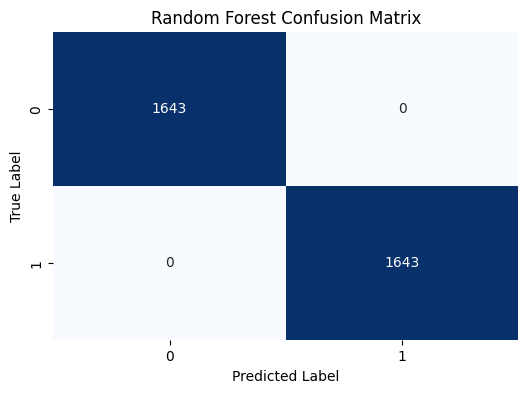

In [ ]:
plot_confusion_matrix(y_test_balanced, y_pred_rf_balanced, "Random Forest Confusion Matrix")

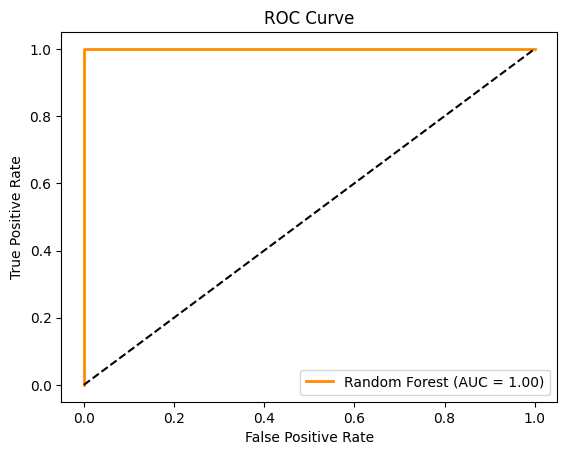

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_rf_prob = rf_model_balanced.predict_proba(X_test_balanced)
fpr_rf_us, tpr_rf_us, _ = roc_curve(y_test_balanced, y_pred_rf_prob[:, 1])
roc_auc_rf_us = auc(fpr_rf_us, tpr_rf_us)

plt.figure()
plt.plot(fpr_rf_us, tpr_rf_us, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf_us:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#undersampling - Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

start_time_balanced = time.time()
nb_model_balanced = GaussianNB()
nb_model_balanced.fit(X_resampled, y_resampled)
y_pred_nb_balanced = nb_model_balanced.predict(X_test_balanced)
end_time_balanced = time.time()

In [ ]:
training_time = end_time_balanced - start_time_balanced
print(f"Thời gian chạy Naive Bayes: {training_time:.4f} giây")

Thời gian chạy Naive Bayes: 0.0126 giây


In [ ]:
accuracy_nb_balanced = accuracy_score(y_test_balanced, y_pred_nb_balanced)
precision_nb_balanced = precision_score(y_test_balanced, y_pred_nb_balanced)
recall_nb_balanced = recall_score(y_test_balanced, y_pred_nb_balanced)
f1_nb_balanced = f1_score(y_test_balanced, y_pred_nb_balanced)

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Metric", "Naive Bayes"]
table.add_row(["Accuracy", accuracy_nb_balanced])
table.add_row(["Precision", precision_nb_balanced])
table.add_row(["Recall", recall_nb_balanced])
table.add_row(["F1 Score", f1_nb_balanced])

print(table)

+-----------+---------------------+
|   Metric  |     Naive Bayes     |
+-----------+---------------------+
|  Accuracy |  0.7297626293365794 |
| Precision |  0.9908972691807543 |
|   Recall  | 0.46378575776019476 |
|  F1 Score |  0.6318407960199005 |
+-----------+---------------------+


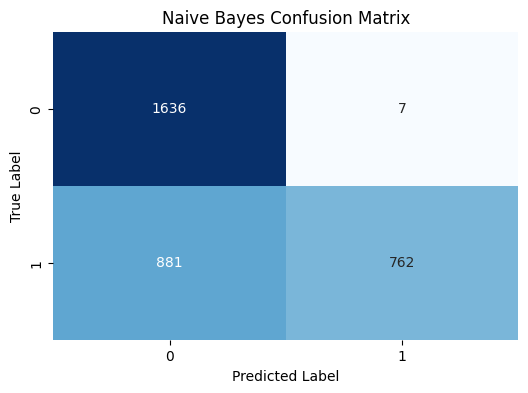

In [ ]:
plot_confusion_matrix(y_test_balanced, y_pred_nb_balanced, "Naive Bayes Confusion Matrix")

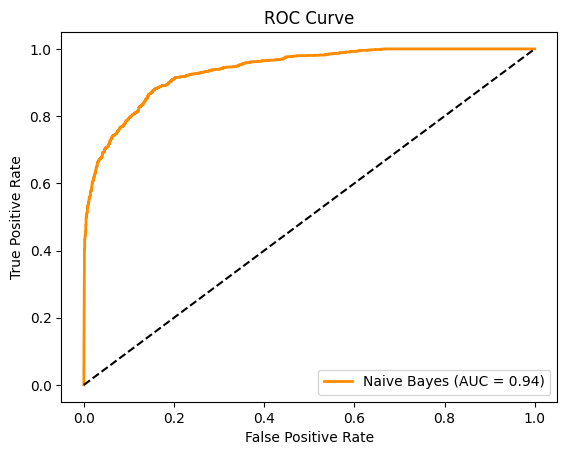

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_nb_prob = nb_model_balanced.predict_proba(X_test_balanced)
fpr_nb_us, tpr_nb_us, _ = roc_curve(y_test_balanced, y_pred_nb_prob[:, 1])
roc_auc_nb_us = auc(fpr_nb_us, tpr_nb_us)


plt.figure()
plt.plot(fpr_nb_us, tpr_nb_us, color='darkorange', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb_us:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#**oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_scaled_balanced, y_balanced)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_resampled_ros, y_resampled_ros, test_size=0.2, random_state=42, stratify=y_resampled_ros)


In [ ]:
from collections import Counter
print(sorted(Counter(y_resampled_ros).items()))

[(0, 6354407), (1, 6354407)]


In [ ]:
y_resampled_ros.value_counts()

,count
isFraud,
0,6354407
1,6354407


#oversampling - Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn import tree
import time

In [ ]:
start_time_balanced = time.time()

dt_model_balanced = DecisionTreeClassifier(random_state=42)
dt_model_balanced.fit(X_resampled_ros, y_resampled_ros)
y_pred_dt_balanced = dt_model_balanced.predict(X_test_balanced)

end_time_balanced = time.time()

In [ ]:
training_time = end_time_balanced - start_time_balanced
print(f"Thời gian chạy Decision Tree: {training_time:.4f} giây")

Thời gian chạy Decision Tree: 368.8052 giây


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_dt_balanced = accuracy_score(y_test_balanced, y_pred_dt_balanced)
precision_dt_balanced = precision_score(y_test_balanced, y_pred_dt_balanced)
recall_dt_balanced = recall_score(y_test_balanced, y_pred_dt_balanced)
f1_dt_balanced = f1_score(y_test_balanced, y_pred_dt_balanced)

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Metric", "Decision Tree"]
table.add_row(["Accuracy", accuracy_dt_balanced])
table.add_row(["Precision", precision_dt_balanced])
table.add_row(["Recall", recall_dt_balanced])
table.add_row(["F1 Score", f1_dt_balanced])

print(table)

+-----------+---------------+
|   Metric  | Decision Tree |
+-----------+---------------+
|  Accuracy |      1.0      |
| Precision |      1.0      |
|   Recall  |      1.0      |
|  F1 Score |      1.0      |
+-----------+---------------+


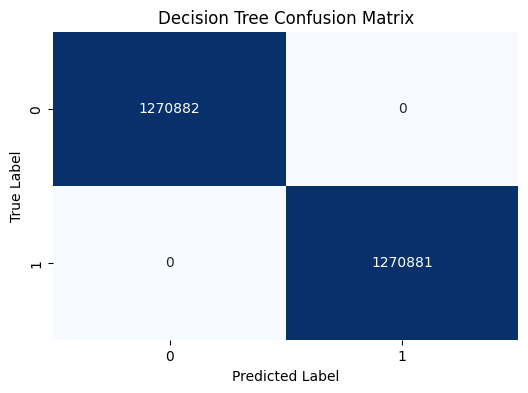

In [ ]:
plot_confusion_matrix(y_test_balanced, y_pred_dt_balanced, "Decision Tree Confusion Matrix")

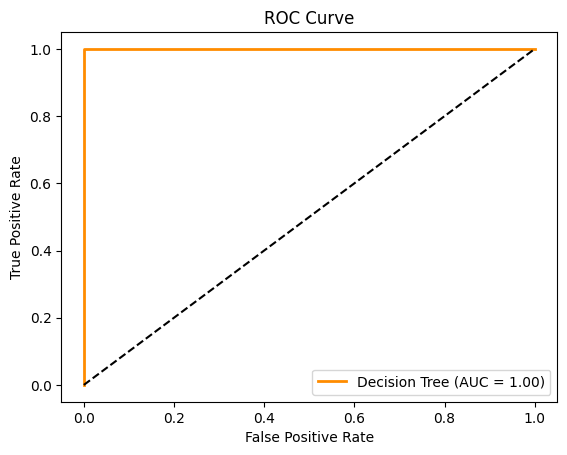

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_dt_prob = dt_model_balanced.predict_proba(X_test_balanced)
fpr_dt_os, tpr_dt_os, _ = roc_curve(y_test_balanced, y_pred_dt_prob[:, 1])
roc_auc_dt_os = auc(fpr_dt_os, tpr_dt_os)

plt.figure()
plt.plot(fpr_dt_os, tpr_dt_os, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt_os:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#oversampling - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

In [ ]:
start_time_balanced = time.time()

rf_model_balanced = RandomForestClassifier(random_state=42)
rf_model_balanced.fit(X_resampled_ros, y_resampled_ros)
y_pred_rf_balanced = rf_model_balanced.predict(X_test_balanced)

end_time_balanced = time.time()

In [ ]:
training_time = end_time_balanced - start_time_balanced
print(f"Thời gian chạy Random Forest: {training_time:.4f} giây")

Thời gian chạy Random Forest: 6627.0217 giây


In [ ]:
accuracy_rf_balanced = accuracy_score(y_test_balanced, y_pred_rf_balanced)
precision_rf_balanced = precision_score(y_test_balanced, y_pred_rf_balanced)
recall_rf_balanced = recall_score(y_test_balanced, y_pred_rf_balanced)
f1_rf_balanced = f1_score(y_test_balanced, y_pred_rf_balanced)

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Metric", "Random Forest"]
table.add_row(["Accuracy", accuracy_rf_balanced])
table.add_row(["Precision", precision_rf_balanced])
table.add_row(["Recall", recall_rf_balanced])
table.add_row(["F1 Score", f1_rf_balanced])

print(table)

+-----------+---------------+
|   Metric  | Random Forest |
+-----------+---------------+
|  Accuracy |      1.0      |
| Precision |      1.0      |
|   Recall  |      1.0      |
|  F1 Score |      1.0      |
+-----------+---------------+


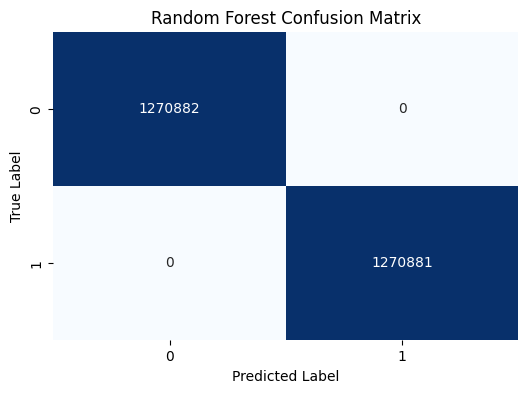

In [ ]:
plot_confusion_matrix(y_test_balanced, y_pred_rf_balanced, "Random Forest Confusion Matrix")

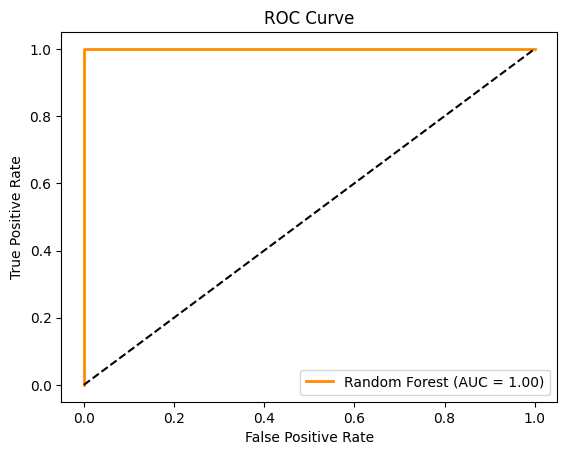

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_rf_prob = rf_model_balanced.predict_proba(X_test_balanced)
fpr_rf_os, tpr_rf_os, _ = roc_curve(y_test_balanced, y_pred_rf_prob[:, 1])
roc_auc_rf_os = auc(fpr_rf_os, tpr_rf_os)

plt.figure()
plt.plot(fpr_rf_os, tpr_rf_os, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf_os:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#oversampling - Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

start_time_balanced = time.time()
nb_model_balanced = GaussianNB()
nb_model_balanced.fit(X_resampled_ros, y_resampled_ros)
y_pred_nb_balanced = nb_model_balanced.predict(X_test_balanced)
end_time_balanced = time.time()

In [ ]:
training_time = end_time_balanced - start_time_balanced
print(f"Thời gian chạy Naive Bayes: {training_time:.4f} giây")

Thời gian chạy Naive Bayes: 5.6703 giây


In [ ]:
accuracy_nb_balanced = accuracy_score(y_test_balanced, y_pred_nb_balanced)
precision_nb_balanced = precision_score(y_test_balanced, y_pred_nb_balanced)
recall_nb_balanced = recall_score(y_test_balanced, y_pred_nb_balanced)
f1_nb_balanced = f1_score(y_test_balanced, y_pred_nb_balanced)

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Metric", "Naive Bayes"]
table.add_row(["Accuracy", accuracy_nb_balanced])
table.add_row(["Precision", precision_nb_balanced])
table.add_row(["Recall", recall_nb_balanced])
table.add_row(["F1 Score", f1_nb_balanced])

print(table)

+-----------+--------------------+
|   Metric  |    Naive Bayes     |
+-----------+--------------------+
|  Accuracy | 0.7255849581569958 |
| Precision | 0.9879996527559095 |
|   Recall  | 0.4567170333020952 |
|  F1 Score | 0.624670947134146  |
+-----------+--------------------+


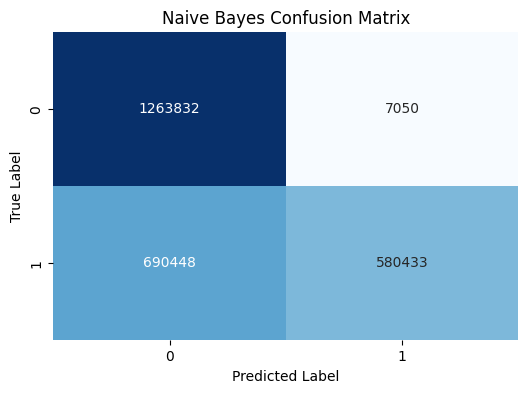

In [ ]:
plot_confusion_matrix(y_test_balanced, y_pred_nb_balanced, "Naive Bayes Confusion Matrix")

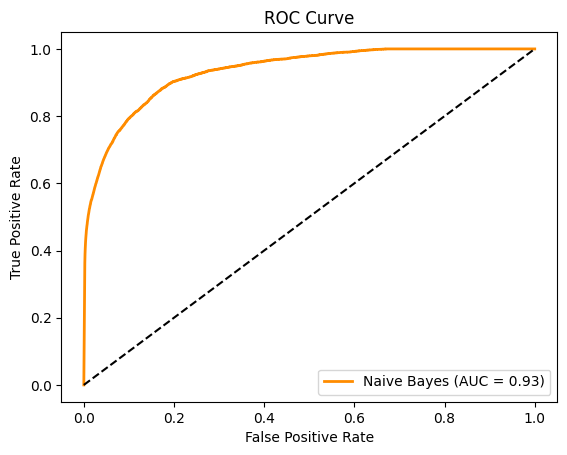

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_nb_prob = nb_model_balanced.predict_proba(X_test_balanced)
fpr_nb_os, tpr_nb_os, _ = roc_curve(y_test_balanced, y_pred_nb_prob[:, 1])
roc_auc_nb_os = auc(fpr_nb_os, tpr_nb_os)


plt.figure()
plt.plot(fpr_nb_os, tpr_nb_os, color='darkorange', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb_os:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_scaled_balanced, y_balanced)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42, stratify=y_resampled_smote)


In [ ]:
from collections import Counter
print(sorted(Counter(y_resampled_smote).items()))

[(0, 6354407), (1, 6354407)]


In [ ]:
y_resampled_smote.value_counts()

,count
isFraud,
0,6354407
1,6354407


#smote - DT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn import tree
import time

In [ ]:
start_time_balanced = time.time()

dt_model_balanced = DecisionTreeClassifier(random_state=42)
dt_model_balanced.fit(X_resampled_smote, y_resampled_smote)
y_pred_dt_balanced = dt_model_balanced.predict(X_test_balanced)

end_time_balanced = time.time()

In [ ]:
training_time = end_time_balanced - start_time_balanced
print(f"Thời gian chạy Decision Tree: {training_time:.4f} giây")

Thời gian chạy Decision Tree: 412.0620 giây


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_dt_balanced = accuracy_score(y_test_balanced, y_pred_dt_balanced)
precision_dt_balanced = precision_score(y_test_balanced, y_pred_dt_balanced)
recall_dt_balanced = recall_score(y_test_balanced, y_pred_dt_balanced)
f1_dt_balanced = f1_score(y_test_balanced, y_pred_dt_balanced)

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Metric", "Decision Tree"]
table.add_row(["Accuracy", accuracy_dt_balanced])
table.add_row(["Precision", precision_dt_balanced])
table.add_row(["Recall", recall_dt_balanced])
table.add_row(["F1 Score", f1_dt_balanced])

print(table)

+-----------+---------------+
|   Metric  | Decision Tree |
+-----------+---------------+
|  Accuracy |      1.0      |
| Precision |      1.0      |
|   Recall  |      1.0      |
|  F1 Score |      1.0      |
+-----------+---------------+


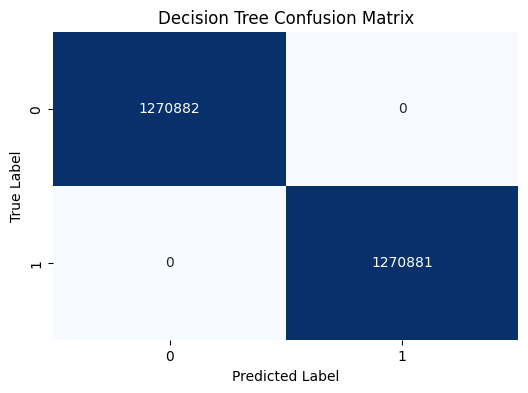

In [ ]:
plot_confusion_matrix(y_test_balanced, y_pred_dt_balanced, "Decision Tree Confusion Matrix")

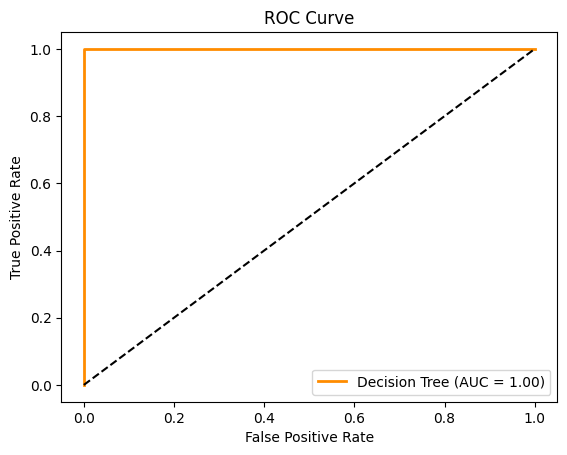

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_dt_prob = dt_model_balanced.predict_proba(X_test_balanced)
fpr_dt_smote, tpr_dt_smote, _ = roc_curve(y_test_balanced, y_pred_dt_prob[:, 1])
roc_auc_dt_smote = auc(fpr_dt_smote, tpr_dt_smote)

plt.figure()
plt.plot(fpr_dt_smote, tpr_dt_smote, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt_smote:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#smote - RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

In [ ]:
start_time_balanced = time.time()

rf_model_balanced = RandomForestClassifier(random_state=42)
rf_model_balanced.fit(X_resampled_smote, y_resampled_smote)
y_pred_rf_balanced = rf_model_balanced.predict(X_test_balanced)

end_time_balanced = time.time()

In [ ]:
training_time = end_time_balanced - start_time_balanced
print(f"Thời gian chạy Random Forest: {training_time:.4f} giây")

Thời gian chạy Random Forest: 9036.3916 giây


In [ ]:
accuracy_rf_balanced = accuracy_score(y_test_balanced, y_pred_rf_balanced)
precision_rf_balanced = precision_score(y_test_balanced, y_pred_rf_balanced)
recall_rf_balanced = recall_score(y_test_balanced, y_pred_rf_balanced)
f1_rf_balanced = f1_score(y_test_balanced, y_pred_rf_balanced)

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Metric", "Random Forest"]
table.add_row(["Accuracy", accuracy_rf_balanced])
table.add_row(["Precision", precision_rf_balanced])
table.add_row(["Recall", recall_rf_balanced])
table.add_row(["F1 Score", f1_rf_balanced])

print(table)

+-----------+---------------+
|   Metric  | Random Forest |
+-----------+---------------+
|  Accuracy |      1.0      |
| Precision |      1.0      |
|   Recall  |      1.0      |
|  F1 Score |      1.0      |
+-----------+---------------+


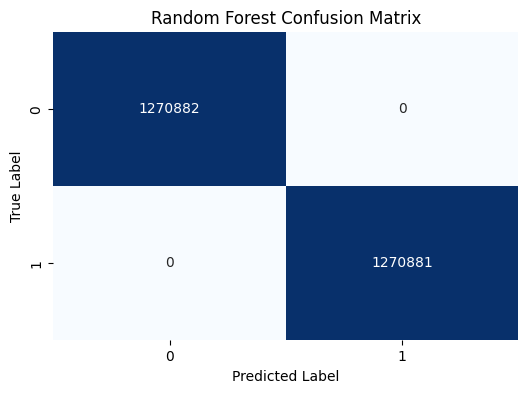

In [ ]:
plot_confusion_matrix(y_test_balanced, y_pred_rf_balanced, "Random Forest Confusion Matrix")

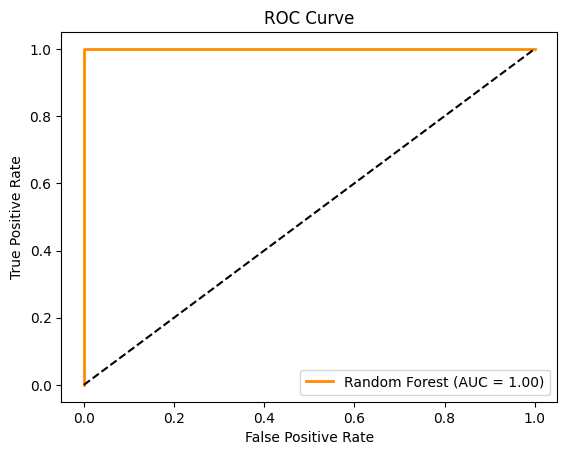

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_rf_prob = rf_model_balanced.predict_proba(X_test_balanced)
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test_balanced, y_pred_rf_prob[:, 1])
roc_auc_rf_smote = auc(fpr_rf_smote, tpr_rf_smote)

plt.figure()
plt.plot(fpr_rf_smote, tpr_rf_smote, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf_smote:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#smote - NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

start_time_balanced = time.time()
nb_model_balanced = GaussianNB()
nb_model_balanced.fit(X_resampled_smote, y_resampled_smote)
y_pred_nb_balanced = nb_model_balanced.predict(X_test_balanced)
end_time_balanced = time.time()

In [ ]:
training_time = end_time_balanced - start_time_balanced
print(f"Thời gian chạy Naive Bayes: {training_time:.4f} giây")

Thời gian chạy Naive Bayes: 4.9128 giây


In [ ]:
accuracy_nb_balanced = accuracy_score(y_test_balanced, y_pred_nb_balanced)
precision_nb_balanced = precision_score(y_test_balanced, y_pred_nb_balanced)
recall_nb_balanced = recall_score(y_test_balanced, y_pred_nb_balanced)
f1_nb_balanced = f1_score(y_test_balanced, y_pred_nb_balanced)

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Metric", "Naive Bayes"]
table.add_row(["Accuracy", accuracy_nb_balanced])
table.add_row(["Precision", precision_nb_balanced])
table.add_row(["Recall", recall_nb_balanced])
table.add_row(["F1 Score", f1_nb_balanced])

print(table)

+-----------+---------------------+
|   Metric  |     Naive Bayes     |
+-----------+---------------------+
|  Accuracy |  0.7252780845421072 |
| Precision |   0.98798702571506  |
|   Recall  | 0.45610171211938805 |
|  F1 Score |  0.6240926366562948 |
+-----------+---------------------+


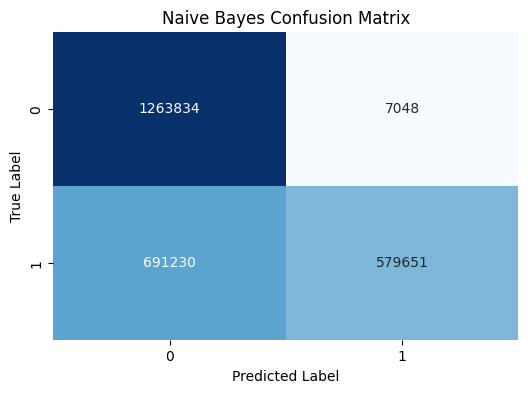

In [ ]:
plot_confusion_matrix(y_test_balanced, y_pred_nb_balanced, "Naive Bayes Confusion Matrix")

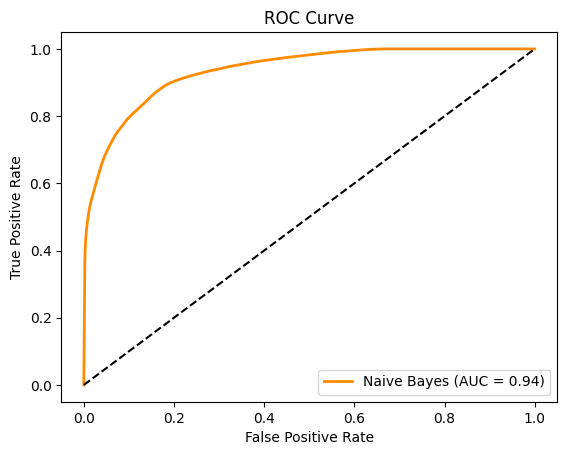

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_nb_prob = nb_model_balanced.predict_proba(X_test_balanced)
fpr_nb_smote, tpr_nb_smote, _ = roc_curve(y_test_balanced, y_pred_nb_prob[:, 1])
roc_auc_nb_smote = auc(fpr_nb_smote, tpr_nb_smote)


plt.figure()
plt.plot(fpr_nb_smote, tpr_nb_smote, color='darkorange', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb_smote:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#**Visualize Data**

In [ ]:
df = pd.read_csv('PS_log.csv')


#*số lượng dl*

<ipython-input-12-1eb2a51b9204>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=transaction_counts_by_type.index, y=transaction_counts_by_type.values, palette='muted')


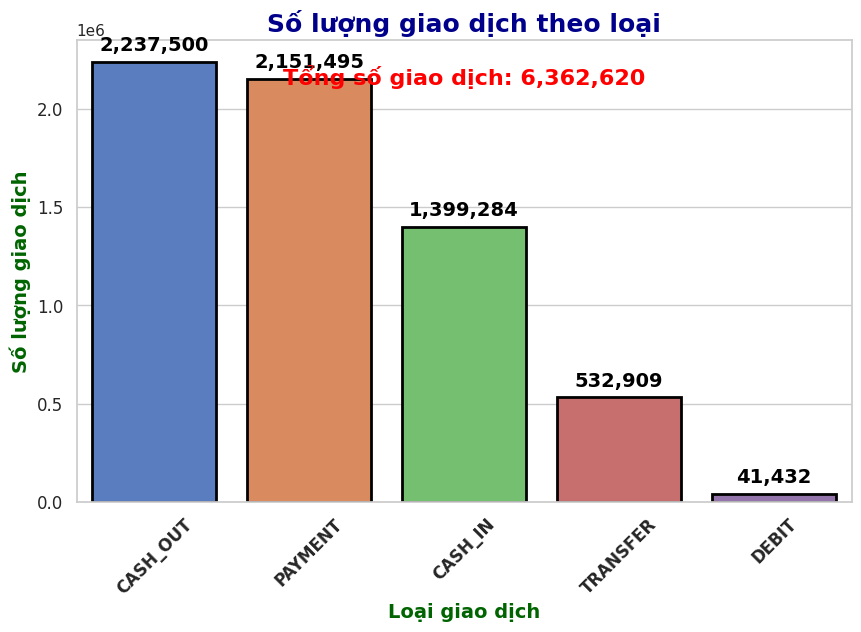

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn có dataframe 'df' với cột 'type' chứa các loại giao dịch

# Tính số lượng giao dịch theo từng loại
transaction_counts_by_type = df['type'].value_counts()

# Tính tổng số giao dịch
total_transactions = len(df)

# Vẽ biểu đồ số lượng giao dịch theo từng loại
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ cột với màu sắc đẹp
sns.set(style="whitegrid")  # Cải thiện kiểu nền
ax = sns.barplot(x=transaction_counts_by_type.index, y=transaction_counts_by_type.values, palette='muted')

# Tăng độ bóng đổ cho các cột
for patch in ax.patches:
    patch.set_edgecolor('black')  # Đặt màu viền cột là đen
    patch.set_linewidth(2)  # Đặt độ dày viền cột

# Thêm các giá trị số vào các cột và điều chỉnh vị trí
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=14, color='black', fontweight='bold', xytext=(0, 5), textcoords='offset points')

# Thêm tổng số giao dịch vào biểu đồ với vị trí phù hợp
ax.annotate(f'Tổng số giao dịch: {total_transactions:,}',
            xy=(0.5, 0.92),  # Đặt tại vị trí phù hợp để tránh đè lên cột
            xycoords='axes fraction',
            ha='center', va='center',
            fontsize=16, color='red', fontweight='bold')

# Thiết lập tiêu đề và nhãn trục
plt.title('Số lượng giao dịch theo loại', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Loại giao dịch', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Số lượng giao dịch', fontsize=14, fontweight='bold', color='darkgreen')

# Tăng khoảng cách cho các nhãn
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Hiển thị biểu đồ
plt.show()


#*giao dịch hợp lệ và gian lận*

<ipython-input-7-6a1dd13408a7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='coolwarm')


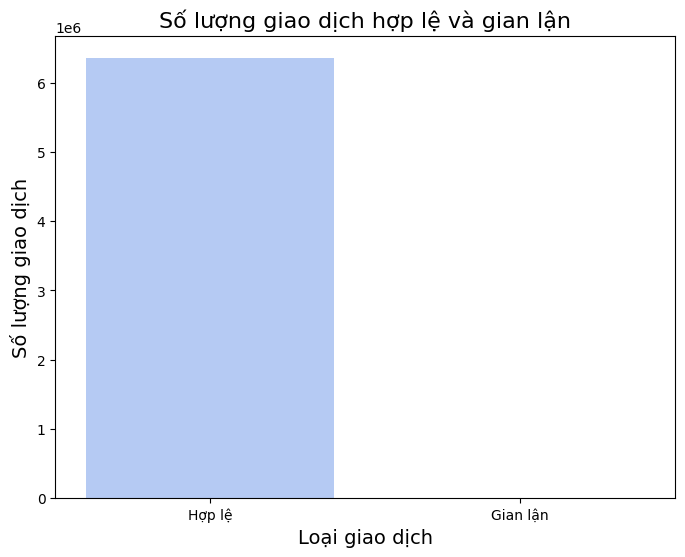

In [ ]:
# Tính số lượng giao dịch hợp lệ và gian lận
transaction_counts = df['isFraud'].value_counts()

# Vẽ biểu đồ số lượng giao dịch hợp lệ và gian lận
plt.figure(figsize=(8, 6))

# Bar plot - Số lượng giao dịch
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='coolwarm')

# Thiết lập tiêu đề và nhãn trục
plt.title('Số lượng giao dịch hợp lệ và gian lận', fontsize=16)
plt.xlabel('Loại giao dịch', fontsize=14)
plt.ylabel('Số lượng giao dịch', fontsize=14)
plt.xticks([0, 1], ['Hợp lệ', 'Gian lận'])

# Hiển thị biểu đồ
plt.show()



<ipython-input-8-9952e9df6c55>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Hợp lệ', 'Gian lận'], y=[valid_ratio, fraud_ratio], palette='coolwarm')


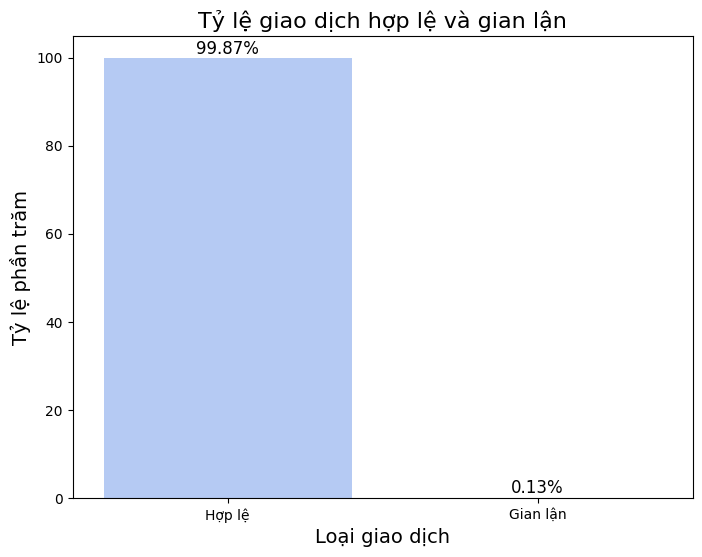

In [ ]:
# Tính tỷ lệ giao dịch gian lận và hợp lệ
fraud_ratio = transaction_counts[1] / transaction_counts.sum() * 100
valid_ratio = transaction_counts[0] / transaction_counts.sum() * 100

# Vẽ biểu đồ tỷ lệ phần trăm
plt.figure(figsize=(8, 6))

# Vẽ biểu đồ cột cho tỷ lệ giao dịch
sns.barplot(x=['Hợp lệ', 'Gian lận'], y=[valid_ratio, fraud_ratio], palette='coolwarm')

# Thiết lập tiêu đề và nhãn trục
plt.title('Tỷ lệ giao dịch hợp lệ và gian lận', fontsize=16)
plt.xlabel('Loại giao dịch', fontsize=14)
plt.ylabel('Tỷ lệ phần trăm', fontsize=14)

# Hiển thị tỷ lệ phần trăm lên trên cột
for i, value in enumerate([valid_ratio, fraud_ratio]):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Hiển thị biểu đồ
plt.show()

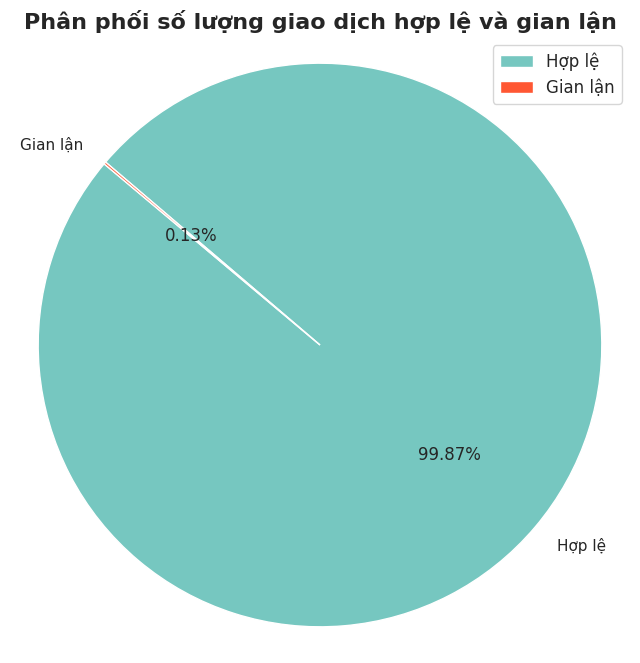

In [ ]:
import matplotlib.pyplot as plt

fraud_counts = df['isFraud'].value_counts()

# Tạo biểu đồ hình tròn
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=['Hợp lệ', 'Gian lận'], autopct='%1.2f%%', startangle=140, colors=['#76c7c0', '#ff5733'])

# Đảm bảo biểu đồ có tỷ lệ bằng nhau để hình tròn không bị méo
plt.axis('equal')

# Thêm tiêu đề
plt.title('Phân phối số lượng giao dịch hợp lệ và gian lận', fontsize=16, fontweight='bold')

plt.legend(fontsize=12)
# Hiển thị biểu đồ
plt.show()


#*phân phối dl*

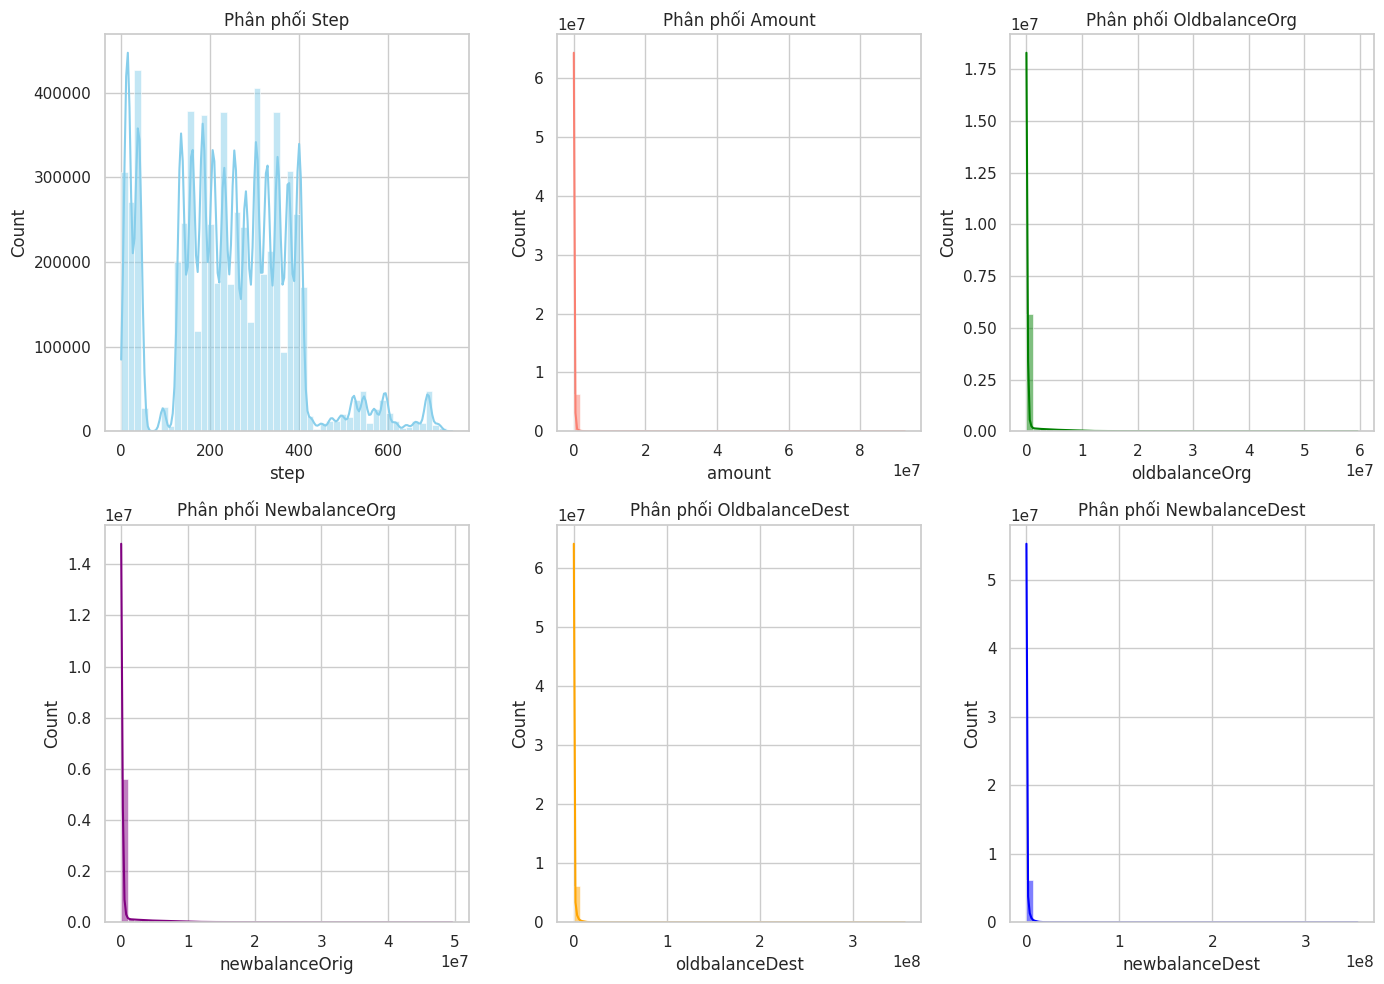

<ipython-input-17-f917abfe30f1>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


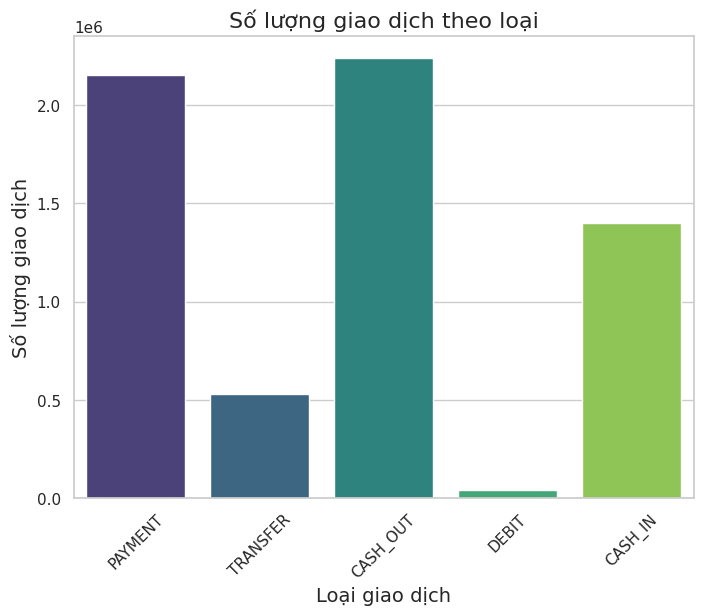

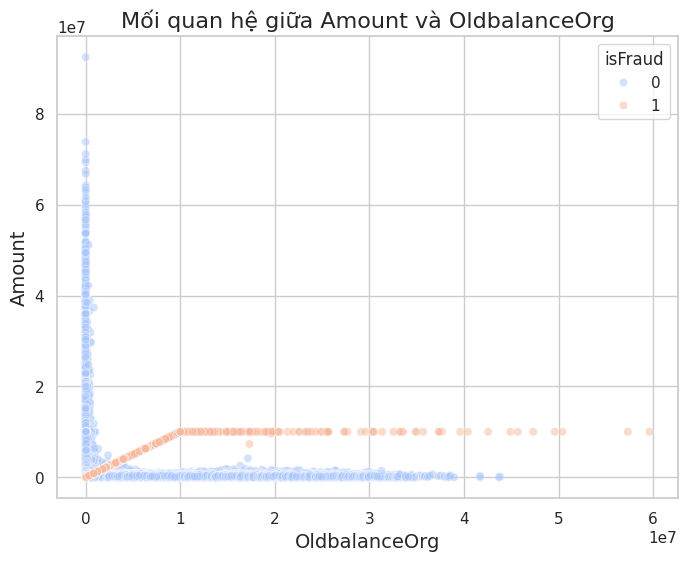

<ipython-input-17-f917abfe30f1>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount', data=df, palette='coolwarm')


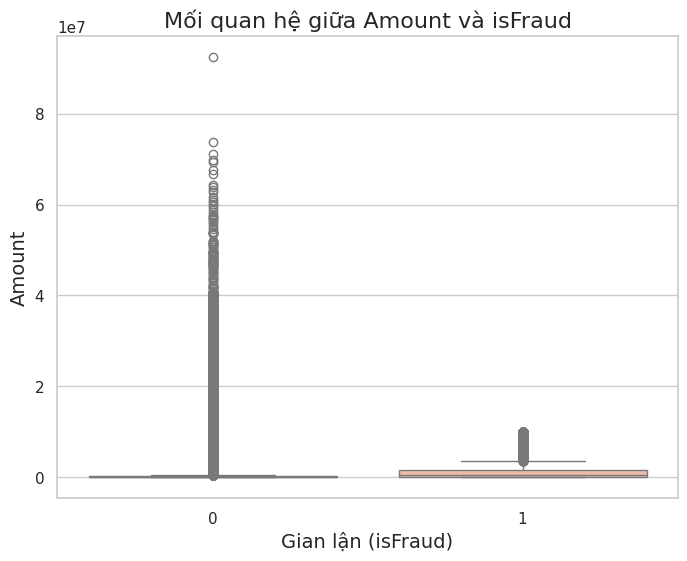

<ipython-input-17-f917abfe30f1>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y='amount', data=df, palette='muted')


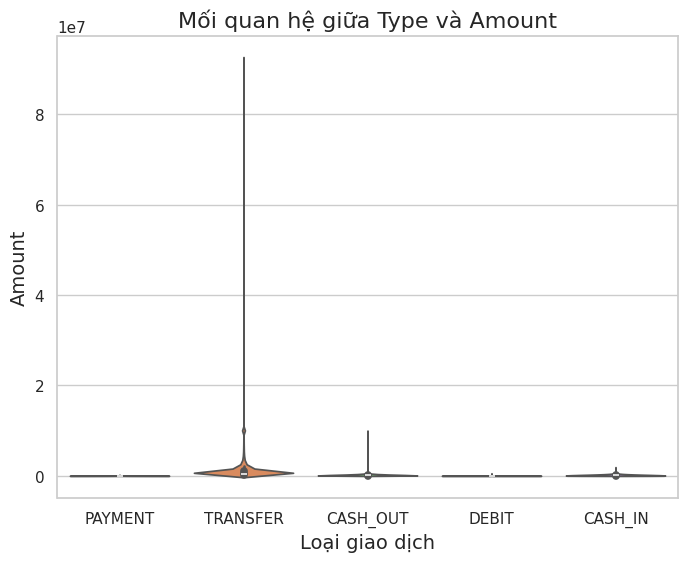

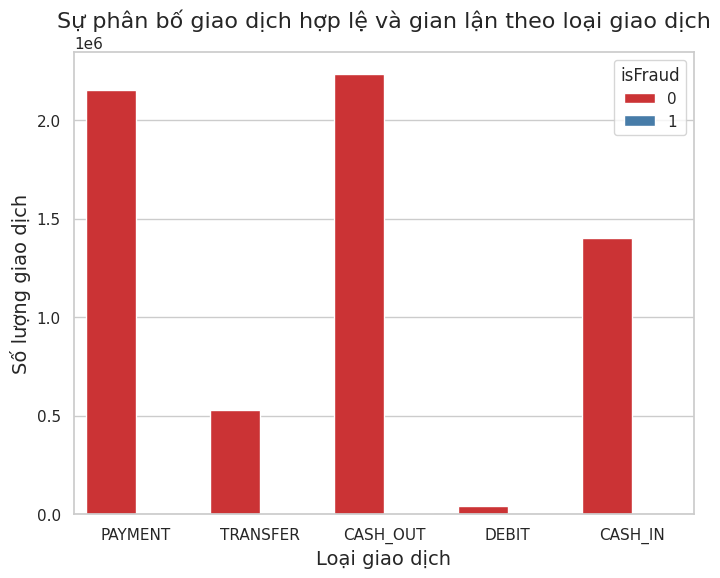

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập cho seaborn và matplotlib
sns.set(style="whitegrid")

# 1. Biểu đồ phân phối cho các trường số
plt.figure(figsize=(14, 10))

# Đặt số lượng các biểu đồ cần vẽ
plt.subplot(2, 3, 1)
sns.histplot(df['step'], bins=50, kde=True, color='skyblue')
plt.title('Phân phối Step')

plt.subplot(2, 3, 2)
sns.histplot(df['amount'], bins=50, kde=True, color='salmon')
plt.title('Phân phối Amount')

plt.subplot(2, 3, 3)
sns.histplot(df['oldbalanceOrg'], bins=50, kde=True, color='green')
plt.title('Phân phối OldbalanceOrg')

plt.subplot(2, 3, 4)
sns.histplot(df['newbalanceOrig'], bins=50, kde=True, color='purple')
plt.title('Phân phối NewbalanceOrg')

plt.subplot(2, 3, 5)
sns.histplot(df['oldbalanceDest'], bins=50, kde=True, color='orange')
plt.title('Phân phối OldbalanceDest')

plt.subplot(2, 3, 6)
sns.histplot(df['newbalanceDest'], bins=50, kde=True, color='blue')
plt.title('Phân phối NewbalanceDest')

plt.tight_layout()
plt.show()

# 2. Biểu đồ phân loại cho trường 'type'
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Số lượng giao dịch theo loại', fontsize=16)
plt.xlabel('Loại giao dịch', fontsize=14)
plt.ylabel('Số lượng giao dịch', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 3. Biểu đồ scatter plot mối quan hệ giữa Amount và OldbalanceOrg
plt.figure(figsize=(8, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', data=df, hue='isFraud', palette='coolwarm', alpha=0.5)
plt.title('Mối quan hệ giữa Amount và OldbalanceOrg', fontsize=16)
plt.xlabel('OldbalanceOrg', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

# 4. Biểu đồ Boxplot cho mối quan hệ giữa Amount và isFraud
plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='amount', data=df, palette='coolwarm')
plt.title('Mối quan hệ giữa Amount và isFraud', fontsize=16)
plt.xlabel('Gian lận (isFraud)', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

# 5. Biểu đồ Violin plot cho mối quan hệ giữa Type và Amount
plt.figure(figsize=(8, 6))
sns.violinplot(x='type', y='amount', data=df, palette='muted')
plt.title('Mối quan hệ giữa Type và Amount', fontsize=16)
plt.xlabel('Loại giao dịch', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

# 6. Biểu đồ mối quan hệ giữa isFraud và Type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', hue='isFraud', data=df, palette='Set1')
plt.title('Sự phân bố giao dịch hợp lệ và gian lận theo loại giao dịch', fontsize=16)
plt.xlabel('Loại giao dịch', fontsize=14)
plt.ylabel('Số lượng giao dịch', fontsize=14)
plt.show()


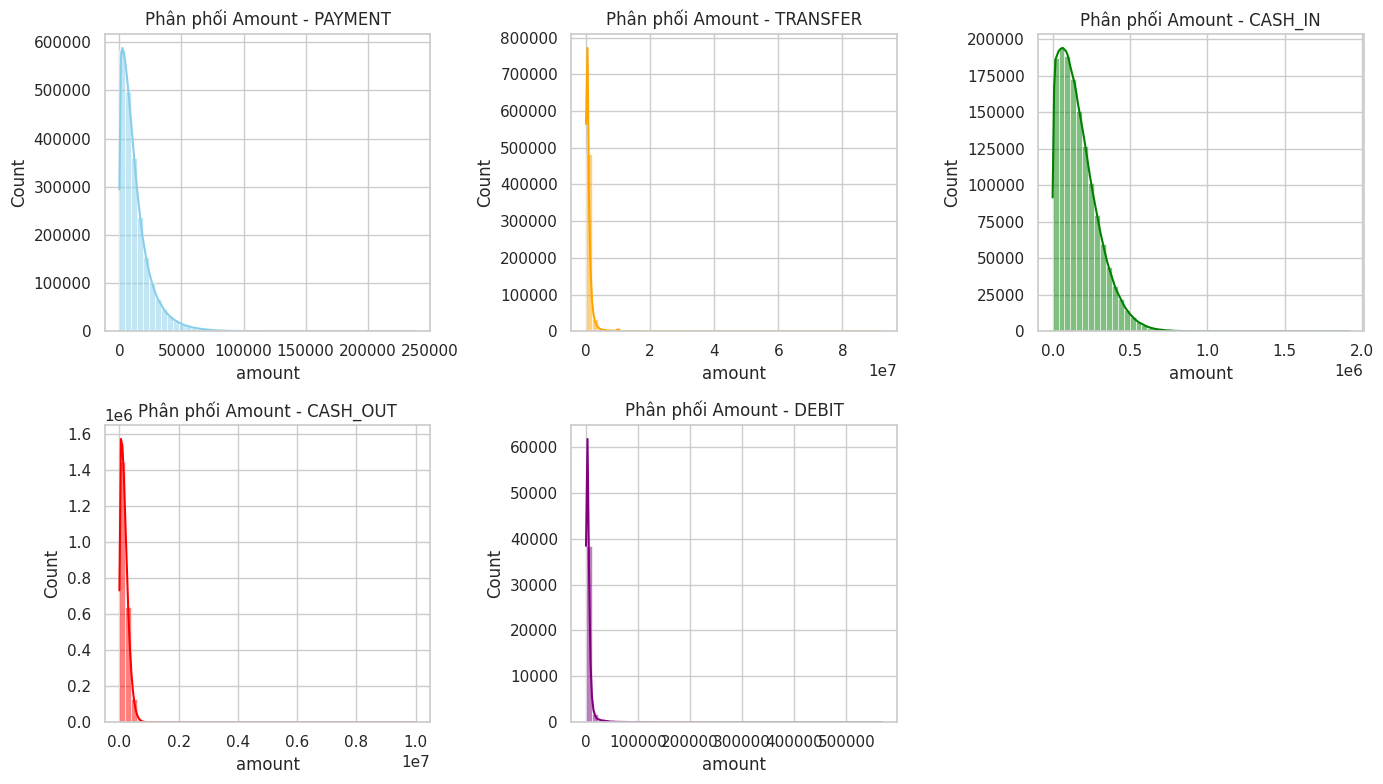

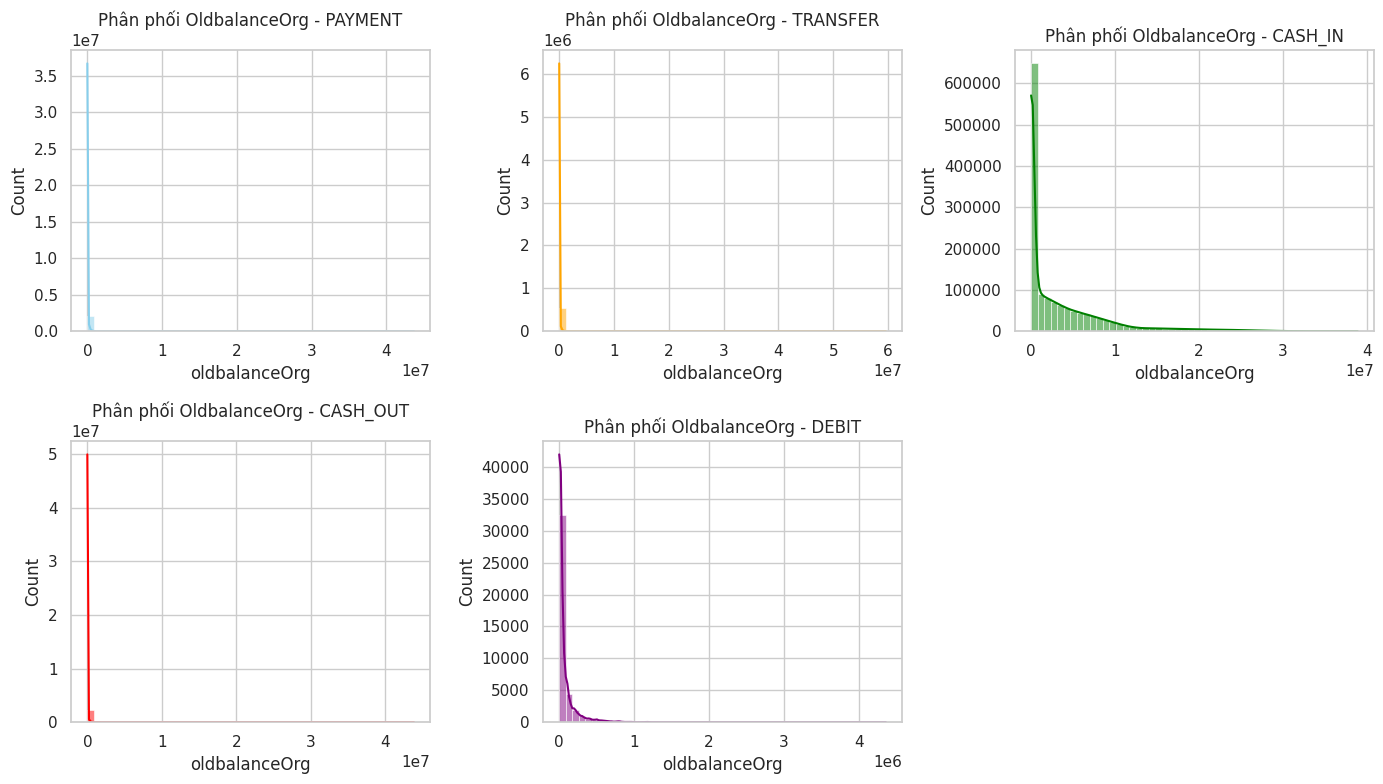

<ipython-input-18-ee34383d9e68>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='amount', data=df, palette='muted')


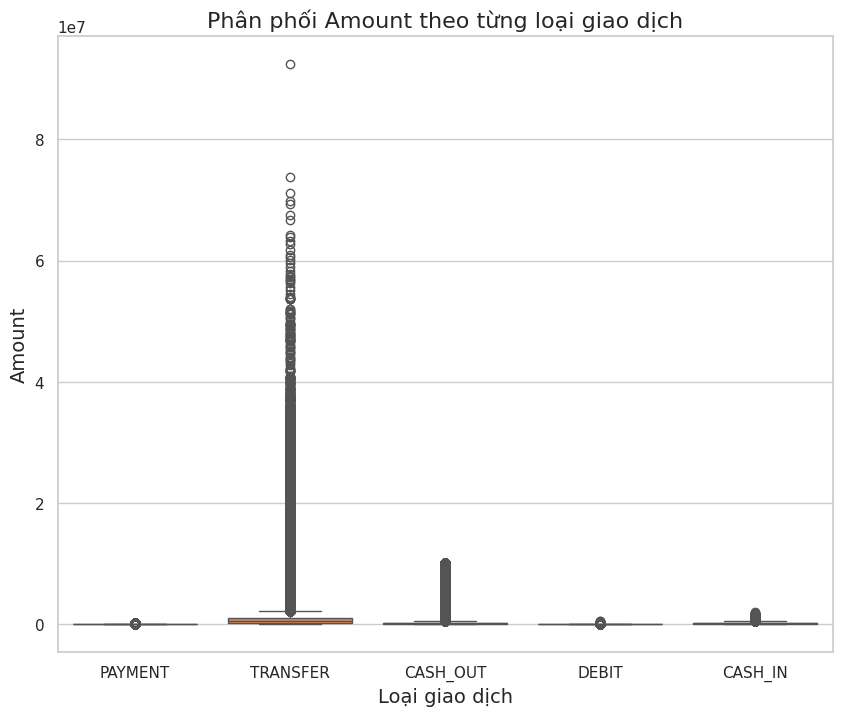

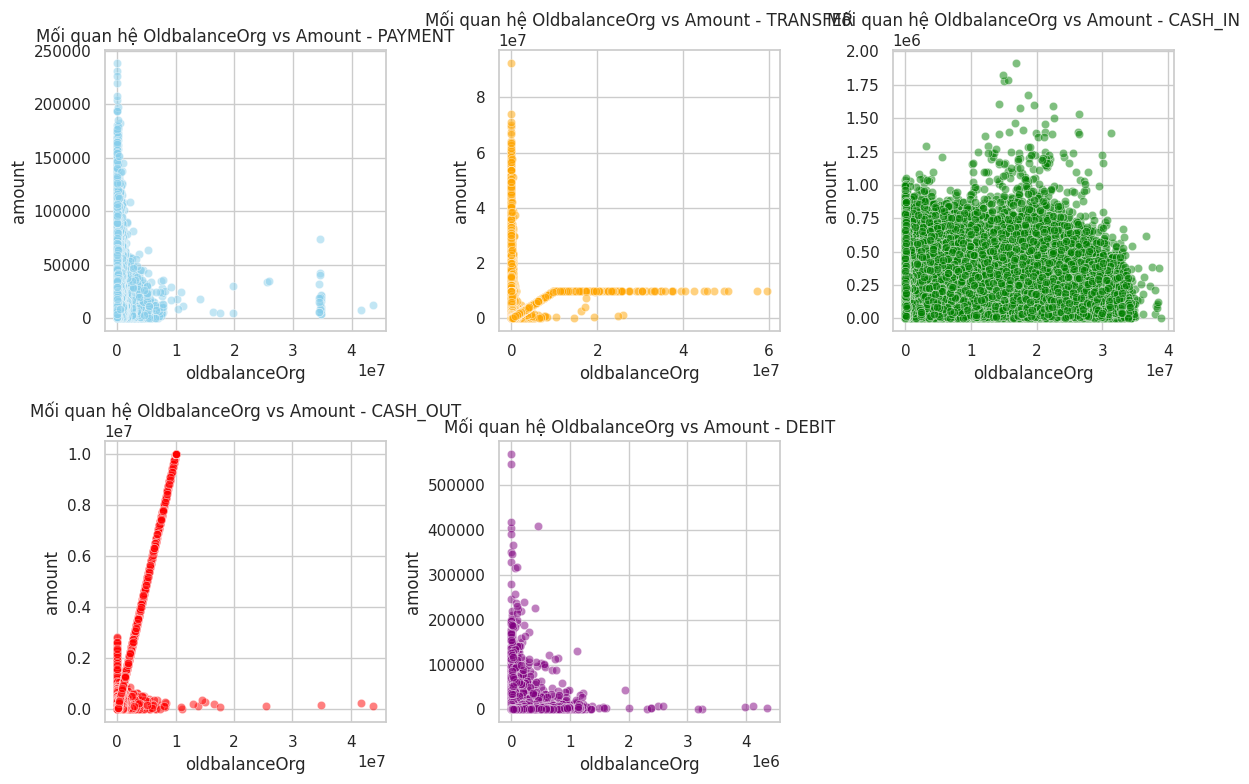

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Phân chia dữ liệu theo loại giao dịch
payment_df = df[df['type'] == 'PAYMENT']
transfer_df = df[df['type'] == 'TRANSFER']
cash_in_df = df[df['type'] == 'CASH_IN']
cash_out_df = df[df['type'] == 'CASH_OUT']
debit_df = df[df['type'] == 'DEBIT']

# Thiết lập seaborn cho các biểu đồ
sns.set(style="whitegrid")

# 1. Biểu đồ phân phối cho Amount của từng loại giao dịch
plt.figure(figsize=(14, 8))

# PAYMENT
plt.subplot(2, 3, 1)
sns.histplot(payment_df['amount'], bins=50, kde=True, color='skyblue')
plt.title('Phân phối Amount - PAYMENT')

# TRANSFER
plt.subplot(2, 3, 2)
sns.histplot(transfer_df['amount'], bins=50, kde=True, color='orange')
plt.title('Phân phối Amount - TRANSFER')

# CASH_IN
plt.subplot(2, 3, 3)
sns.histplot(cash_in_df['amount'], bins=50, kde=True, color='green')
plt.title('Phân phối Amount - CASH_IN')

# CASH_OUT
plt.subplot(2, 3, 4)
sns.histplot(cash_out_df['amount'], bins=50, kde=True, color='red')
plt.title('Phân phối Amount - CASH_OUT')

# DEBIT
plt.subplot(2, 3, 5)
sns.histplot(debit_df['amount'], bins=50, kde=True, color='purple')
plt.title('Phân phối Amount - DEBIT')

plt.tight_layout()
plt.show()

# 2. Biểu đồ phân phối cho OldbalanceOrg của từng loại giao dịch
plt.figure(figsize=(14, 8))

# PAYMENT
plt.subplot(2, 3, 1)
sns.histplot(payment_df['oldbalanceOrg'], bins=50, kde=True, color='skyblue')
plt.title('Phân phối OldbalanceOrg - PAYMENT')

# TRANSFER
plt.subplot(2, 3, 2)
sns.histplot(transfer_df['oldbalanceOrg'], bins=50, kde=True, color='orange')
plt.title('Phân phối OldbalanceOrg - TRANSFER')

# CASH_IN
plt.subplot(2, 3, 3)
sns.histplot(cash_in_df['oldbalanceOrg'], bins=50, kde=True, color='green')
plt.title('Phân phối OldbalanceOrg - CASH_IN')

# CASH_OUT
plt.subplot(2, 3, 4)
sns.histplot(cash_out_df['oldbalanceOrg'], bins=50, kde=True, color='red')
plt.title('Phân phối OldbalanceOrg - CASH_OUT')

# DEBIT
plt.subplot(2, 3, 5)
sns.histplot(debit_df['oldbalanceOrg'], bins=50, kde=True, color='purple')
plt.title('Phân phối OldbalanceOrg - DEBIT')

plt.tight_layout()
plt.show()

# 3. Biểu đồ boxplot cho Amount theo từng loại giao dịch
plt.figure(figsize=(10, 8))
sns.boxplot(x='type', y='amount', data=df, palette='muted')
plt.title('Phân phối Amount theo từng loại giao dịch', fontsize=16)
plt.xlabel('Loại giao dịch', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

# 4. Biểu đồ mối quan hệ giữa OldbalanceOrg và Amount cho các loại giao dịch
plt.figure(figsize=(12, 8))

# PAYMENT
plt.subplot(2, 3, 1)
sns.scatterplot(x='oldbalanceOrg', y='amount', data=payment_df, color='skyblue', alpha=0.5)
plt.title('Mối quan hệ OldbalanceOrg vs Amount - PAYMENT')

# TRANSFER
plt.subplot(2, 3, 2)
sns.scatterplot(x='oldbalanceOrg', y='amount', data=transfer_df, color='orange', alpha=0.5)
plt.title('Mối quan hệ OldbalanceOrg vs Amount - TRANSFER')

# CASH_IN
plt.subplot(2, 3, 3)
sns.scatterplot(x='oldbalanceOrg', y='amount', data=cash_in_df, color='green', alpha=0.5)
plt.title('Mối quan hệ OldbalanceOrg vs Amount - CASH_IN')

# CASH_OUT
plt.subplot(2, 3, 4)
sns.scatterplot(x='oldbalanceOrg', y='amount', data=cash_out_df, color='red', alpha=0.5)
plt.title('Mối quan hệ OldbalanceOrg vs Amount - CASH_OUT')

# DEBIT
plt.subplot(2, 3, 5)
sns.scatterplot(x='oldbalanceOrg', y='amount', data=debit_df, color='purple', alpha=0.5)
plt.title('Mối quan hệ OldbalanceOrg vs Amount - DEBIT')

plt.tight_layout()
plt.show()


#*tỷ lệ gian lận các type*

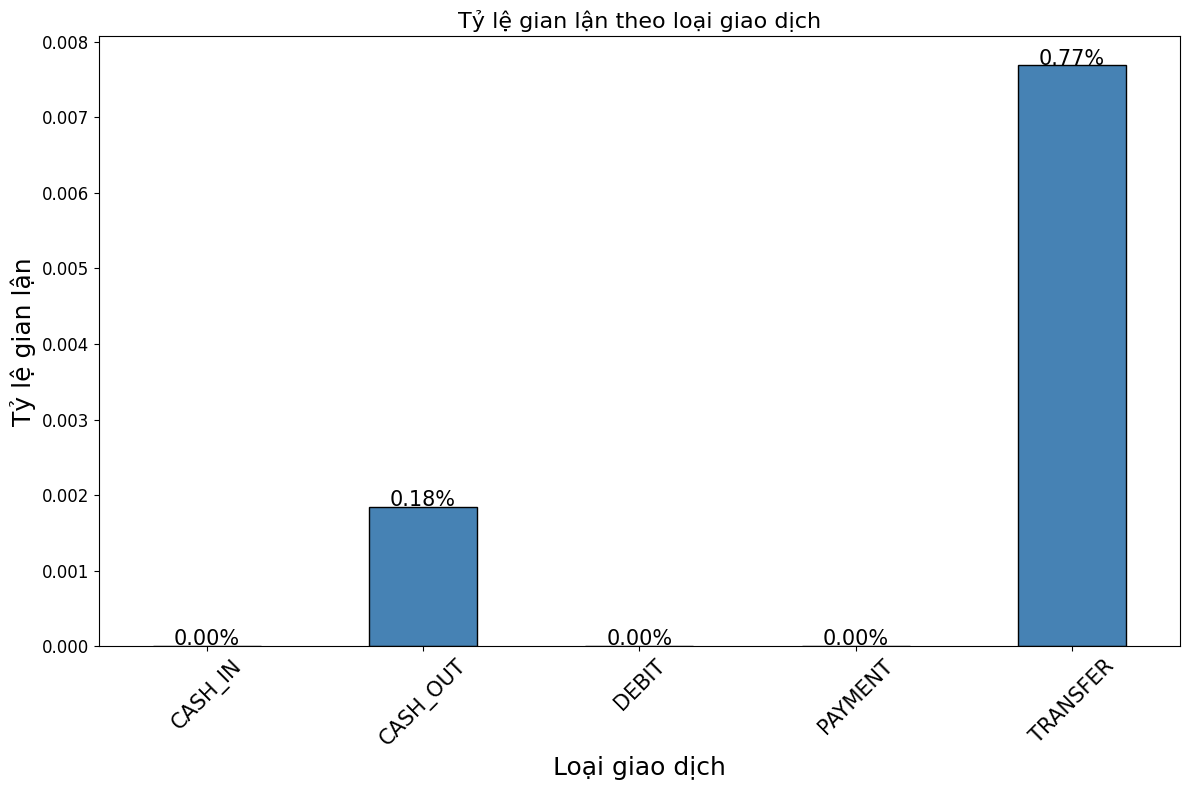

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tính tỷ lệ gian lận cho từng loại giao dịch
fraud_ratio_by_type = df.groupby('type')['isFraud'].mean()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))
fraud_ratio_by_type.plot(kind='bar', color='steelblue', edgecolor='black')

# Thêm tiêu đề, nhãn và giá trị lên trên các cột
plt.title('Tỷ lệ gian lận theo loại giao dịch', fontsize=16)
plt.xlabel('Loại giao dịch', fontsize=18)
plt.ylabel('Tỷ lệ gian lận', fontsize=18)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=12)

# Thêm chú thích giá trị trên các cột
for i, value in enumerate(fraud_ratio_by_type):
    plt.text(i, value+0.00001, f"{value:.2%}", ha='center', fontsize=15)

plt.tight_layout()
plt.show()


#*Org and Dest*

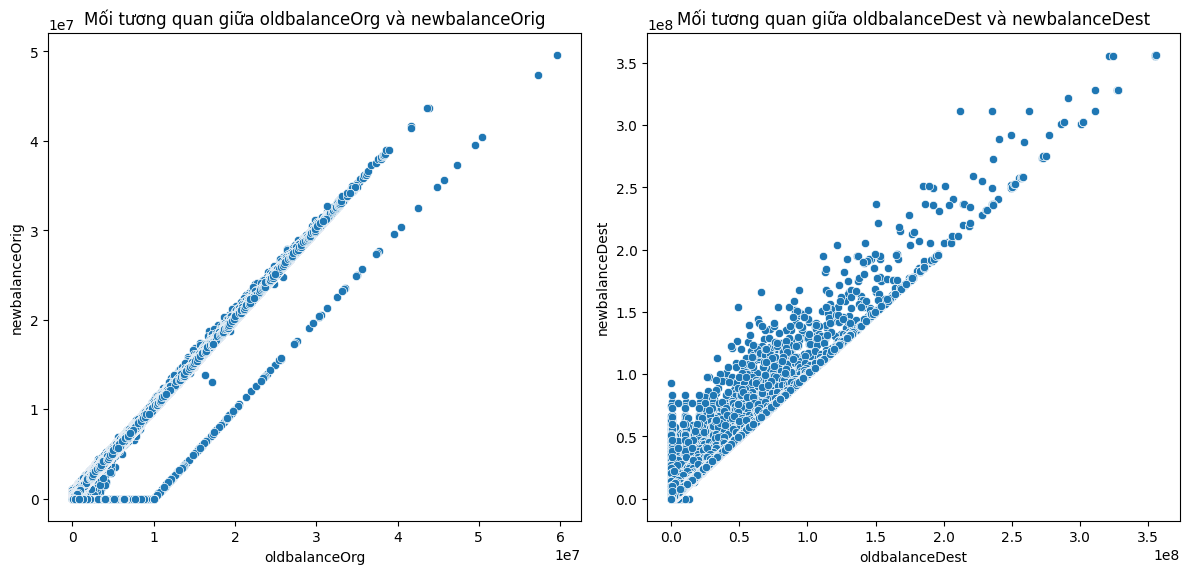

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử bạn đã có DataFrame df với các cột sau:
# df['oldbalanceOrg'], df['newbalanceOrig'], df['oldbalanceDest'], df['newbalanceDest']

# Vẽ biểu đồ phân tán cho từng cặp thuộc tính
plt.figure(figsize=(12, 6))

# Scatter plot cho oldbalanceOrg và newbalanceOrig
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['oldbalanceOrg'], y=df['newbalanceOrig'])
plt.title('Mối tương quan giữa oldbalanceOrg và newbalanceOrig')

# Scatter plot cho oldbalanceDest và newbalanceDest
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['oldbalanceDest'], y=df['newbalanceDest'])
plt.title('Mối tương quan giữa oldbalanceDest và newbalanceDest')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
